In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import random   
import scipy.stats
from scipy import stats

In [3]:
import statannotations

In [4]:
import matplotlib.pyplot as plt 
import random   
import scipy
import scipy.stats
from statannotations.Annotator import Annotator

In [5]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [6]:
def Topo_adj(dp):
    n=len(set(dp['Source']))
    adj = pd.DataFrame([[0]*n]*n)
    adj.columns=list(set(dp.loc[:,'Source']))
    print(list(set(dp.loc[:,'Source'])))
    #print(set(dp.loc[:,'Source']))
    adj.index=list(set(dp.loc[:,'Target']))
    print(list(set(dp.loc[:,'Target'])))
    for i in range(len(dp)):
        if dp.iloc[i,2] == 1:
            adj.loc[dp.iloc[i,0] , dp.iloc[i,1] ] = 1
        elif dp.iloc[i,2] == 2:
            adj.loc[dp.iloc[i,0] , dp.iloc[i,1] ] = -1

    

    return adj


In [7]:
def matrix_index_sort(mat):
    mat = mat.sort_index()
    mat = mat.T
    mat = mat.sort_index()
    mat = mat.T
    return mat

In [8]:
def influence(dp, n,pl):
    n=len(set(dp['Source']))
    infl = pd.DataFrame([[0]*n]*n)
    infl.columns=set(dp.loc[:,'Source'])
    infl.index=set(dp.loc[:,'Source'])
    adj = Topo_adj(dp)
    adj=matrix_index_sort(adj)

    maxi = abs(adj)
    pr = adj
    mr = abs(adj)
    infl = adj
    for i in range(1, pl):
        pr=adj@pr
        mr = maxi@mr
        qwe = pr/mr

        infl = infl + qwe.replace(np.nan, 0)
        
        

    infl  = infl/pl
    infl=infl.round(2)
    return infl

In [11]:
def Team_Strength_finder(influence_matrix, Team1, Team2):   
    TeamScores = pd.DataFrame(0, columns = [0,1], index = [0,1] )

    teams = [Team1, Team2]

    for t1 in range(len(teams)):
        for t2 in range(len(teams)):
            Tsc= 0 
            count = 0
            #print(teams[t1])
            for i in teams[t1]:
                for j in teams[t2]:
                    Tsc += influence_matrix.loc[i,j]
                    count +=1
                    #print(t1,t2)
            TeamScores.loc[t1,t2] = Tsc/count   

    TeamScores.columns = ['TeamB','TeamA']

    TeamScores.index = ['TeamB','TeamA']
    TeamScores
    return abs(TeamScores).sum(axis = 1).sum(axis = 0)/4

In [12]:
melt_table_complete = pd.read_csv('Impurity_Density_all_Figure4.csv', index_col=0)
melt_table_complete

index             Type  Core_Density  \
0    0Indegree20% Density_0 Nodes_0 Edges_0  Lowered Density   20% Density   
1    0Indegree20% Density_0 Nodes_0 Edges_1  Lowered Density   20% Density   
2    0Indegree20% Density_0 Nodes_0 Edges_2  Lowered Density   20% Density   
3    0Indegree20% Density_0 Nodes_0 Edges_3  Lowered Density   20% Density   
4    0Indegree20% Density_0 Nodes_0 Edges_4  Lowered Density   20% Density   
..                                      ...              ...           ...   
5   0Indegree100% Density_0 Nodes_0 Edges_5  Lowered Density  100% Density   
6   0Indegree100% Density_0 Nodes_0 Edges_6  Lowered Density  100% Density   
7   0Indegree100% Density_0 Nodes_0 Edges_7  Lowered Density  100% Density   
8   0Indegree100% Density_0 Nodes_0 Edges_8  Lowered Density  100% Density   
9   0Indegree100% Density_0 Nodes_0 Edges_9  Lowered Density  100% Density   

   Peripheral_Nodes  Peripheral_Edges     BiC A     BiC B     CC AB  \
0           0 Nodes                 0  0.360508  0.351521  0.611713   
1           0 Nodes                 0  0.352921  0.360658  0.626797   
2           0 Nodes                 0  0.372417  0.386632  0.670843   
3           0 Nodes                 0  0.361877  0.353170  0.612533   
4           0 Nodes                 0  0.399494  0.402254  0.663785   
..              ...               ...       ...       ...       ...   
5           0 Nodes                 0  0.800119  0.799962 -0.869819   
6           0 Nodes                 0  0.795385  0.795455 -0.873501   
7           0 Nodes                 0  0.795211  0.795276 -0.872114   
8           0 Nodes                 0  0.797940  0.798141 -0.872319   
9           0 Nodes                 0  0.797525  0.797459 -0.871668   

    F1 (Average)  F1 (Strict)  Team Strength  Team Size  \
0       0.000062     0.000000          0.045          5   
1       0.000090     0.000000          0.043          5   
2       0.000077     0.000000          0.042          5   
3       0.000271     0.000000          0.045          5   
4       0.000148     0.000000          0.045          5   
..           ...          ...            ...        ...   
5       0.808440     0.778649          1.000          5   
6       0.803762     0.774866          1.000          5   
7       0.803665     0.776139          1.000          5   
8       0.806614     0.775681          1.000          5   
9       0.806029     0.777778          1.000          5   

    Number_of_Self_Activations  indegree Self Activation Status  \
0                            0         0   With Self Activation   
1                            0         0   With Self Activation   
2                            0         0   With Self Activation   
3                            0         0   With Self Activation   
4                            0         0   With Self Activation   
..                         ...       ...                    ...   
5                            0         0   With Self Activation   
6                            0         0   With Self Activation   
7                            0         0   With Self Activation   
8                            0         0   With Self Activation   
9                            0         0   With Self Activation   

    Percentage Impurity Percentage_Impurity  
0                     0       100% Impurity  
1                     0       100% Impurity  
2                     0       100% Impurity  
3                     0       100% Impurity  
4                     0       100% Impurity  
..                  ...                 ...  
5                     0         0% Impurity  
6                     0         0% Impurity  
7                     0         0% Impurity  
8                     0         0% Impurity  
9                     0         0% Impurity  

[2910 rows x 17 columns]

In [13]:
melt_table_complete= melt_table_complete.replace({
    '0% Impurity': 0,
    '20% Impurity': 20,
    '40% Impurity': 40,
    '60% Impurity': 60,
    '80% Impurity': 80,
    '100% Impurity': 100,
    "20% Density": 20,
    "40% Density": 40,
    "60% Density": 60,
    "80% Density": 80,
    "100% Density": 100,
})
melt_table_complete



index             Type  Core_Density  \
0    0Indegree20% Density_0 Nodes_0 Edges_0  Lowered Density            20   
1    0Indegree20% Density_0 Nodes_0 Edges_1  Lowered Density            20   
2    0Indegree20% Density_0 Nodes_0 Edges_2  Lowered Density            20   
3    0Indegree20% Density_0 Nodes_0 Edges_3  Lowered Density            20   
4    0Indegree20% Density_0 Nodes_0 Edges_4  Lowered Density            20   
..                                      ...              ...           ...   
5   0Indegree100% Density_0 Nodes_0 Edges_5  Lowered Density           100   
6   0Indegree100% Density_0 Nodes_0 Edges_6  Lowered Density           100   
7   0Indegree100% Density_0 Nodes_0 Edges_7  Lowered Density           100   
8   0Indegree100% Density_0 Nodes_0 Edges_8  Lowered Density           100   
9   0Indegree100% Density_0 Nodes_0 Edges_9  Lowered Density           100   

   Peripheral_Nodes  Peripheral_Edges     BiC A     BiC B     CC AB  \
0           0 Nodes                 0  0.360508  0.351521  0.611713   
1           0 Nodes                 0  0.352921  0.360658  0.626797   
2           0 Nodes                 0  0.372417  0.386632  0.670843   
3           0 Nodes                 0  0.361877  0.353170  0.612533   
4           0 Nodes                 0  0.399494  0.402254  0.663785   
..              ...               ...       ...       ...       ...   
5           0 Nodes                 0  0.800119  0.799962 -0.869819   
6           0 Nodes                 0  0.795385  0.795455 -0.873501   
7           0 Nodes                 0  0.795211  0.795276 -0.872114   
8           0 Nodes                 0  0.797940  0.798141 -0.872319   
9           0 Nodes                 0  0.797525  0.797459 -0.871668   

    F1 (Average)  F1 (Strict)  Team Strength  Team Size  \
0       0.000062     0.000000          0.045          5   
1       0.000090     0.000000          0.043          5   
2       0.000077     0.000000          0.042          5   
3       0.000271     0.000000          0.045          5   
4       0.000148     0.000000          0.045          5   
..           ...          ...            ...        ...   
5       0.808440     0.778649          1.000          5   
6       0.803762     0.774866          1.000          5   
7       0.803665     0.776139          1.000          5   
8       0.806614     0.775681          1.000          5   
9       0.806029     0.777778          1.000          5   

    Number_of_Self_Activations  indegree Self Activation Status  \
0                            0         0   With Self Activation   
1                            0         0   With Self Activation   
2                            0         0   With Self Activation   
3                            0         0   With Self Activation   
4                            0         0   With Self Activation   
..                         ...       ...                    ...   
5                            0         0   With Self Activation   
6                            0         0   With Self Activation   
7                            0         0   With Self Activation   
8                            0         0   With Self Activation   
9                            0         0   With Self Activation   

    Percentage Impurity  Percentage_Impurity  
0                     0                  100  
1                     0                  100  
2                     0                  100  
3                     0                  100  
4                     0                  100  
..                  ...                  ...  
5                     0                    0  
6                     0                    0  
7                     0                    0  
8                     0                    0  
9                     0                    0  

[2910 rows x 17 columns]

In [14]:
melt_table_complete


index             Type  Core_Density  \
0    0Indegree20% Density_0 Nodes_0 Edges_0  Lowered Density            20   
1    0Indegree20% Density_0 Nodes_0 Edges_1  Lowered Density            20   
2    0Indegree20% Density_0 Nodes_0 Edges_2  Lowered Density            20   
3    0Indegree20% Density_0 Nodes_0 Edges_3  Lowered Density            20   
4    0Indegree20% Density_0 Nodes_0 Edges_4  Lowered Density            20   
..                                      ...              ...           ...   
5   0Indegree100% Density_0 Nodes_0 Edges_5  Lowered Density           100   
6   0Indegree100% Density_0 Nodes_0 Edges_6  Lowered Density           100   
7   0Indegree100% Density_0 Nodes_0 Edges_7  Lowered Density           100   
8   0Indegree100% Density_0 Nodes_0 Edges_8  Lowered Density           100   
9   0Indegree100% Density_0 Nodes_0 Edges_9  Lowered Density           100   

   Peripheral_Nodes  Peripheral_Edges     BiC A     BiC B     CC AB  \
0           0 Nodes                 0  0.360508  0.351521  0.611713   
1           0 Nodes                 0  0.352921  0.360658  0.626797   
2           0 Nodes                 0  0.372417  0.386632  0.670843   
3           0 Nodes                 0  0.361877  0.353170  0.612533   
4           0 Nodes                 0  0.399494  0.402254  0.663785   
..              ...               ...       ...       ...       ...   
5           0 Nodes                 0  0.800119  0.799962 -0.869819   
6           0 Nodes                 0  0.795385  0.795455 -0.873501   
7           0 Nodes                 0  0.795211  0.795276 -0.872114   
8           0 Nodes                 0  0.797940  0.798141 -0.872319   
9           0 Nodes                 0  0.797525  0.797459 -0.871668   

    F1 (Average)  F1 (Strict)  Team Strength  Team Size  \
0       0.000062     0.000000          0.045          5   
1       0.000090     0.000000          0.043          5   
2       0.000077     0.000000          0.042          5   
3       0.000271     0.000000          0.045          5   
4       0.000148     0.000000          0.045          5   
..           ...          ...            ...        ...   
5       0.808440     0.778649          1.000          5   
6       0.803762     0.774866          1.000          5   
7       0.803665     0.776139          1.000          5   
8       0.806614     0.775681          1.000          5   
9       0.806029     0.777778          1.000          5   

    Number_of_Self_Activations  indegree Self Activation Status  \
0                            0         0   With Self Activation   
1                            0         0   With Self Activation   
2                            0         0   With Self Activation   
3                            0         0   With Self Activation   
4                            0         0   With Self Activation   
..                         ...       ...                    ...   
5                            0         0   With Self Activation   
6                            0         0   With Self Activation   
7                            0         0   With Self Activation   
8                            0         0   With Self Activation   
9                            0         0   With Self Activation   

    Percentage Impurity  Percentage_Impurity  
0                     0                  100  
1                     0                  100  
2                     0                  100  
3                     0                  100  
4                     0                  100  
..                  ...                  ...  
5                     0                    0  
6                     0                    0  
7                     0                    0  
8                     0                    0  
9                     0                    0  

[2910 rows x 17 columns]

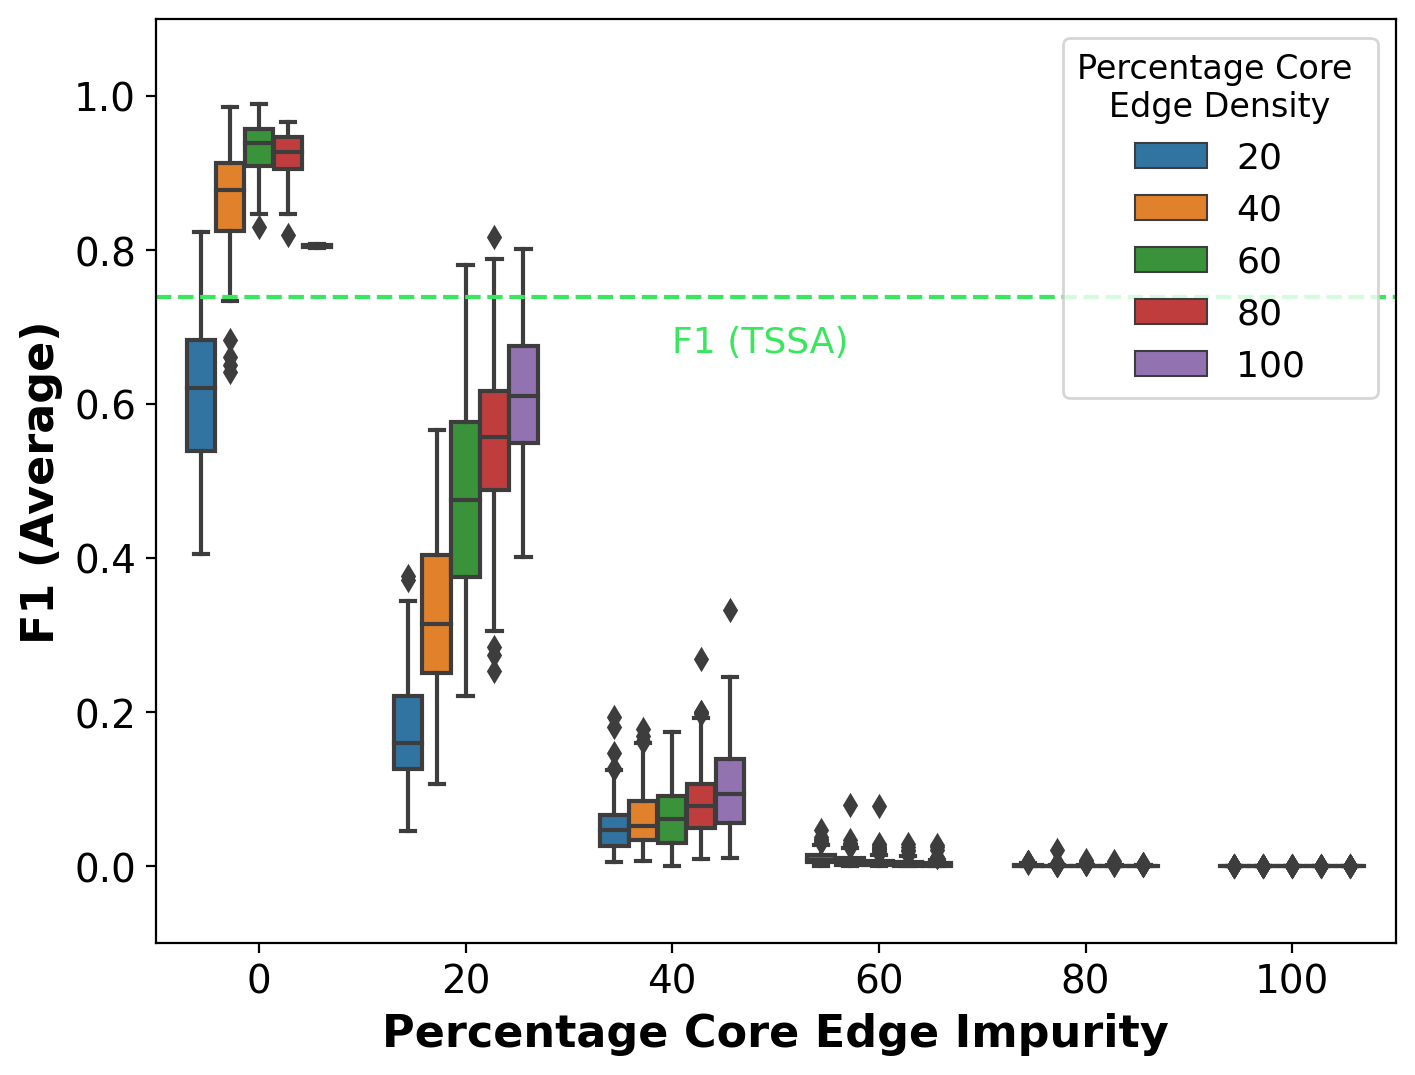

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data



# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1 (Average)',
        x='Percentage_Impurity',
        hue='Core_Density',
        data=melt_table_complete,
        width=0.7
    )

    # plt.title('F1 (Average) vs Percentage Core Edge Impurity (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=16, fontweight='bold')
    plt.ylabel('F1 (Average)', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.axhline(y=0.739, linestyle='--', color='#39e75f')
    plt.text(2, 0.68, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=13)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n   Edge Density', fontsize=13,  loc='upper right')
# plt.savefig('impurity_density_plotting_toggle_switch/F1_Average_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Switch.png')
plt.show()


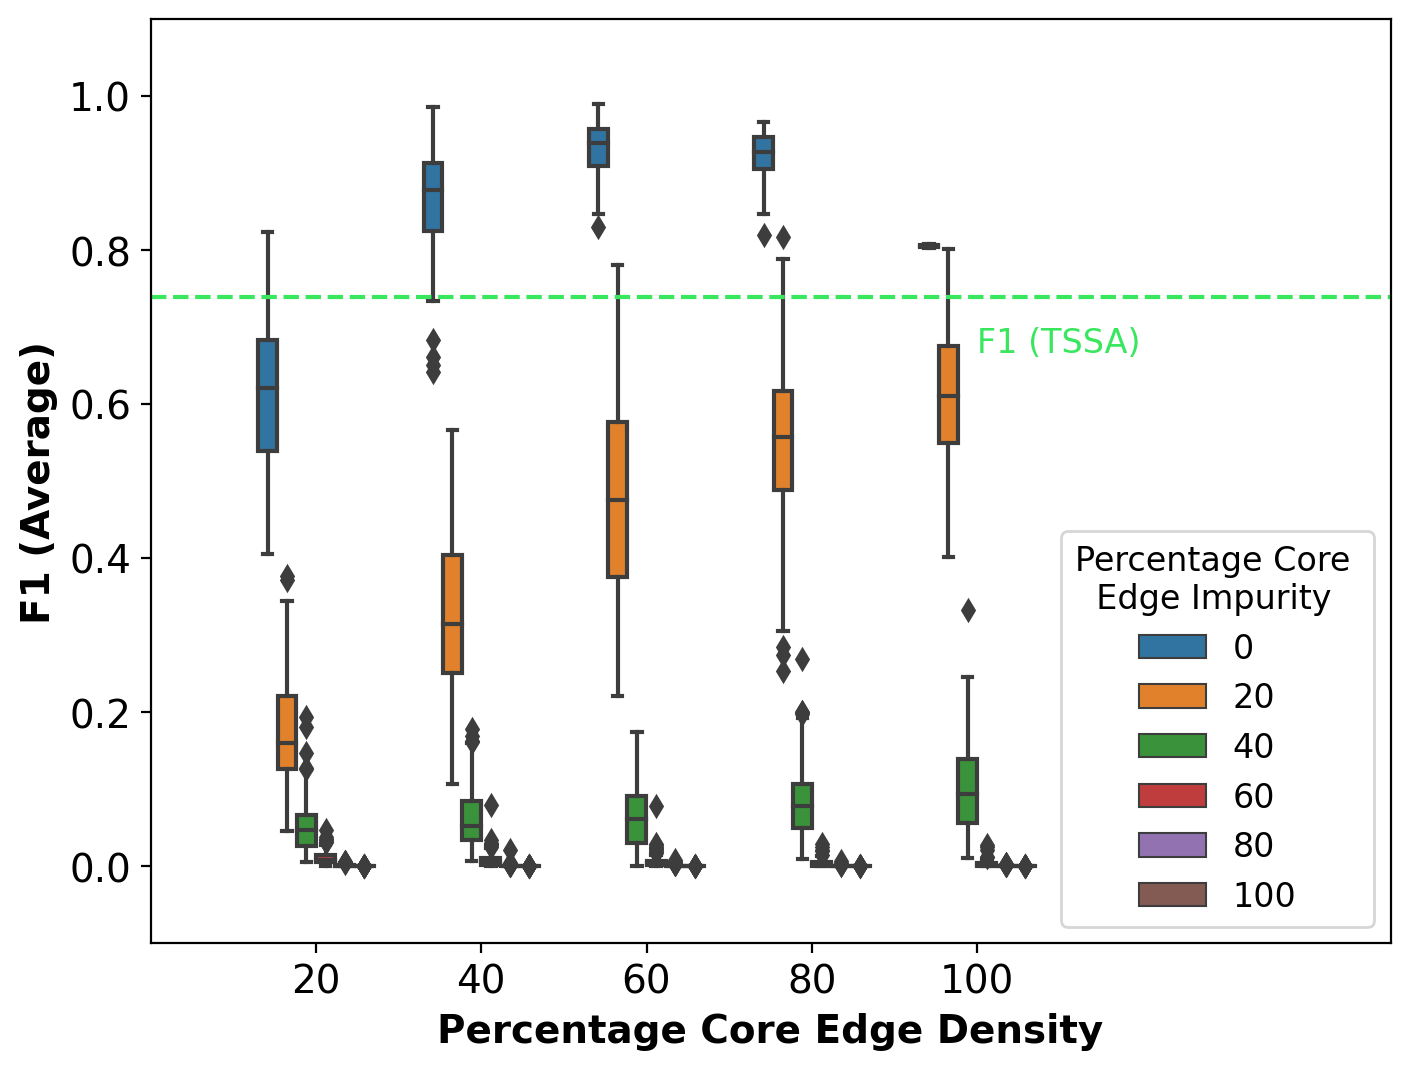

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data



# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1 (Average)',
        x='Core_Density',
        hue='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    # plt.title('F1 (Average) vs Percentage Core Edge Density (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('F1 (Average)', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,6.5)
    plt.axhline(y=0.739, linestyle='--', color='#39e75f')
    plt.text(4, 0.68, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)


    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='lower right')
plt.savefig('impurity_density_plotting_toggle_switch/F1_Average_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Switch.png')
plt.show()


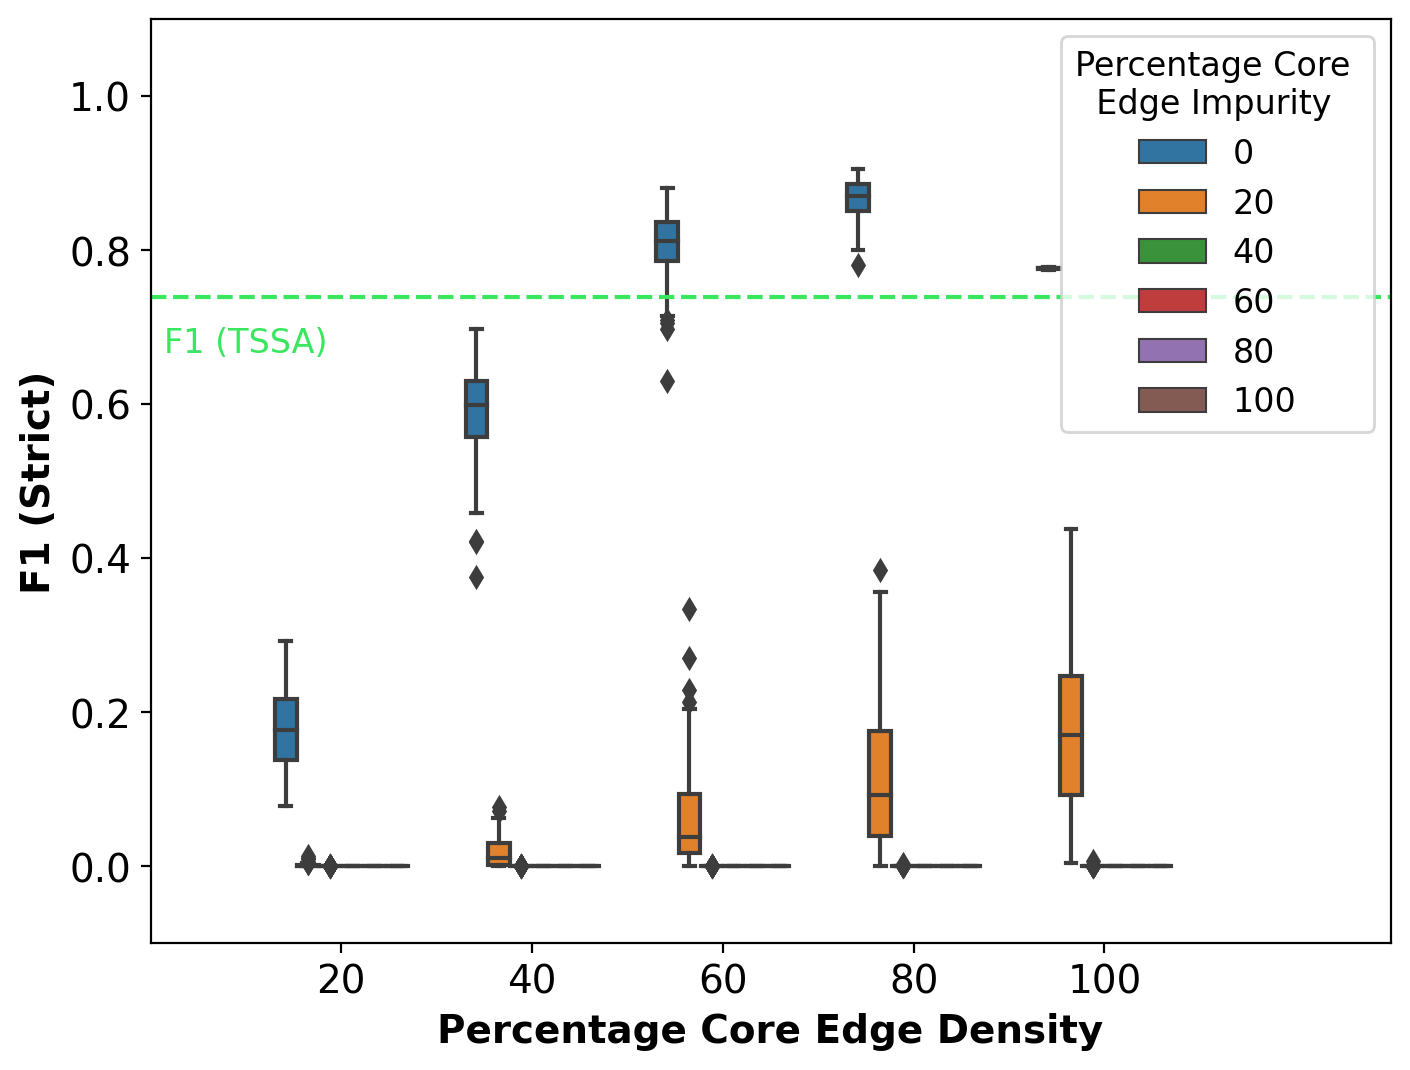

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'F1 (Strict)'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    # plt.title('F1 (Strict) vs Percentage Core Edge Density (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('F1 (Strict)', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,5.5)
    plt.axhline(y=0.739, linestyle='--', color='#39e75f')
    plt.text(-0.93, 0.68, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='upper right')
    plt.savefig('impurity_density_plotting_toggle_switch/F1_Strict_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Switch.png')

plt.show()


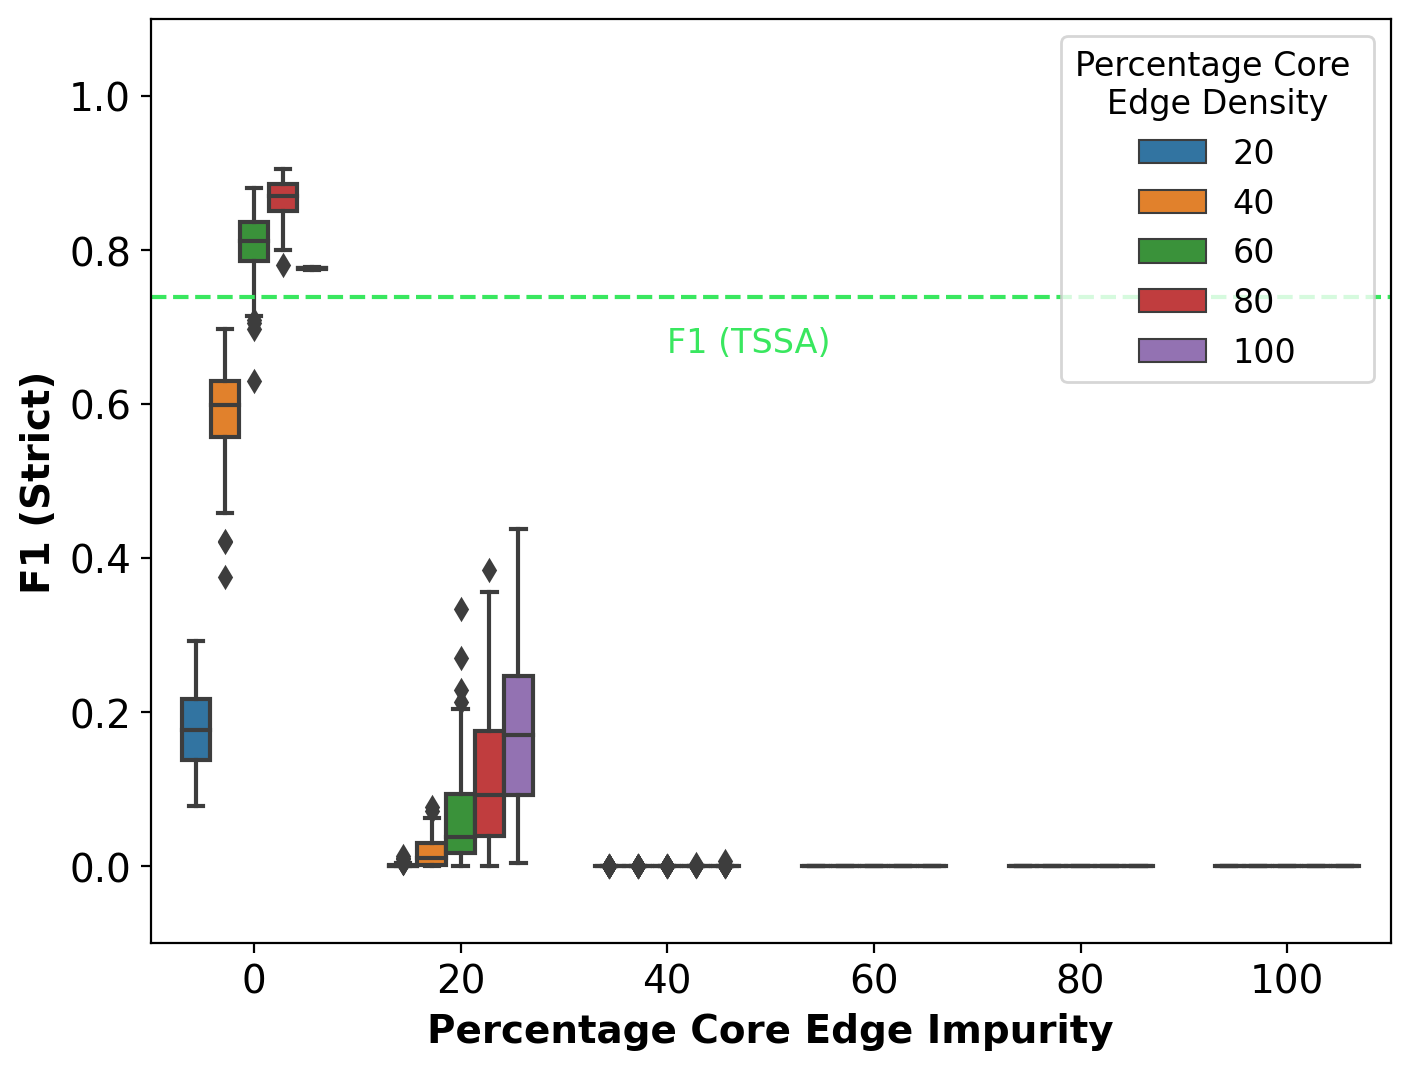

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'F1 (Strict)'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue ='Core_Density',
        x='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    # plt.title('F1 (Strict) vs Percentage Core Edge Impurity (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel('F1 (Strict)', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.axhline(y=0.739, linestyle='--', color='#39e75f')
    plt.text(2, 0.68, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    # plt.xlim(0,5.5)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n   Edge Density', fontsize=12, loc='upper right')
plt.savefig('impurity_density_plotting_toggle_switch/F1_Strict_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Switch.png')
plt.show()


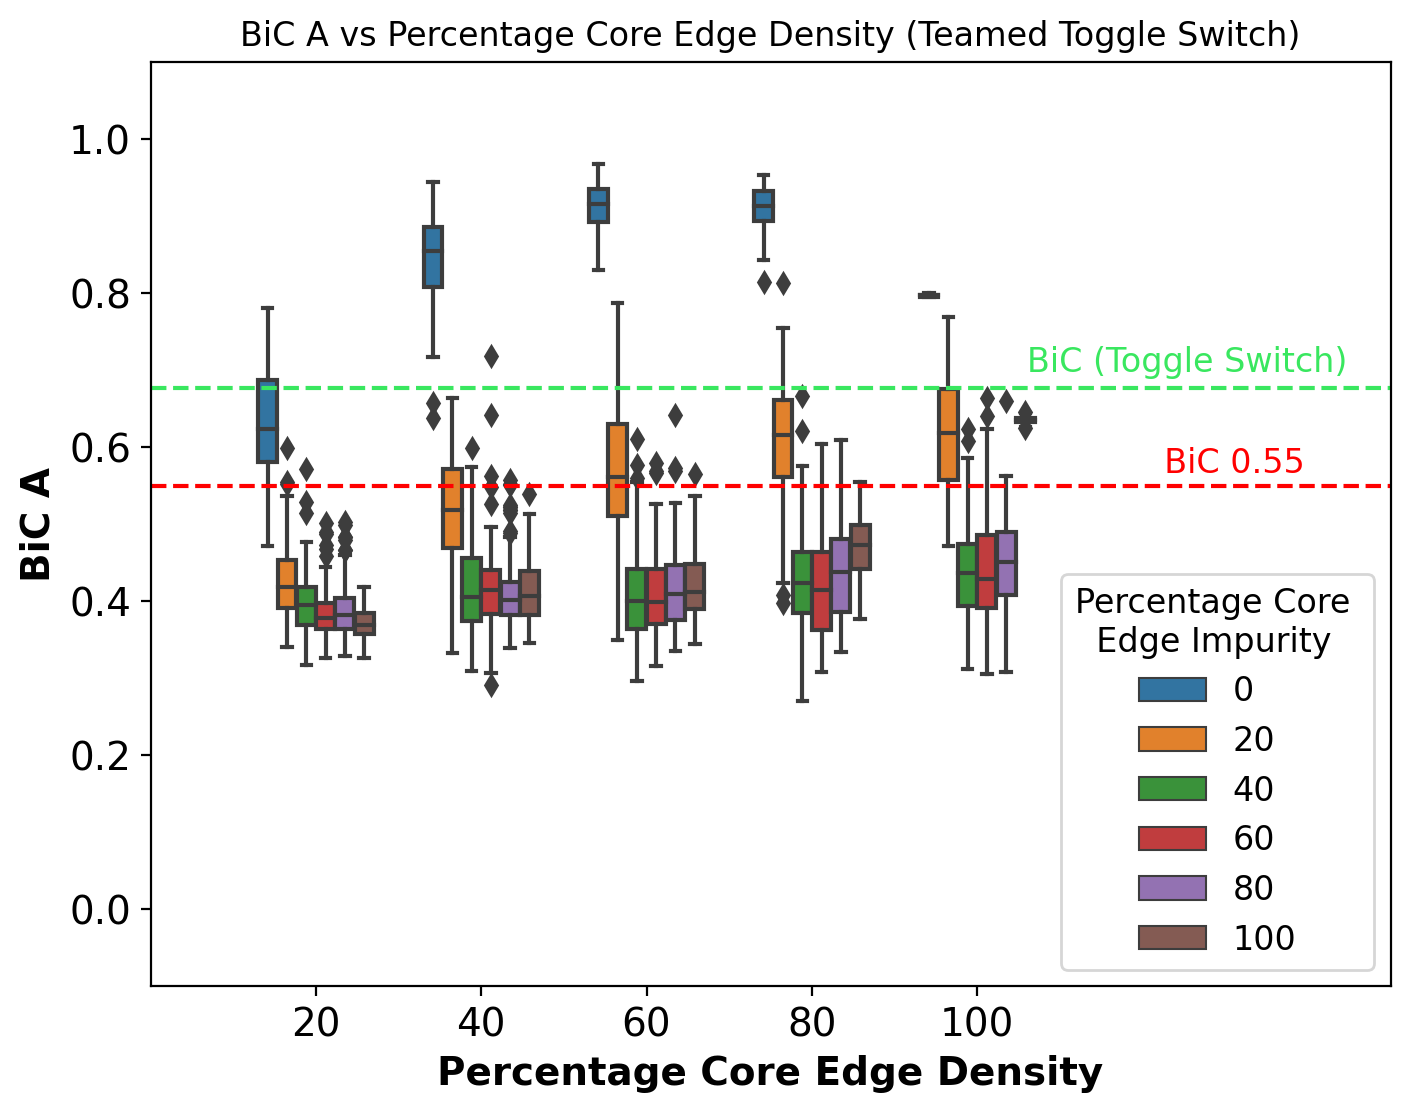

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC A'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    plt.title(Metric +' vs Percentage Core Edge Density (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel(Metric+'', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,6.5)
    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(5, 0.58, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)
    
    plt.axhline(y=0.6769, linestyle='--', color='#39e75f')
    plt.text(4.3, 0.71, 'BiC (Toggle Switch)', color='#39e75f', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='lower right')
plt.savefig('impurity_density_plotting/BiC_A_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Switch.png')
plt.show()


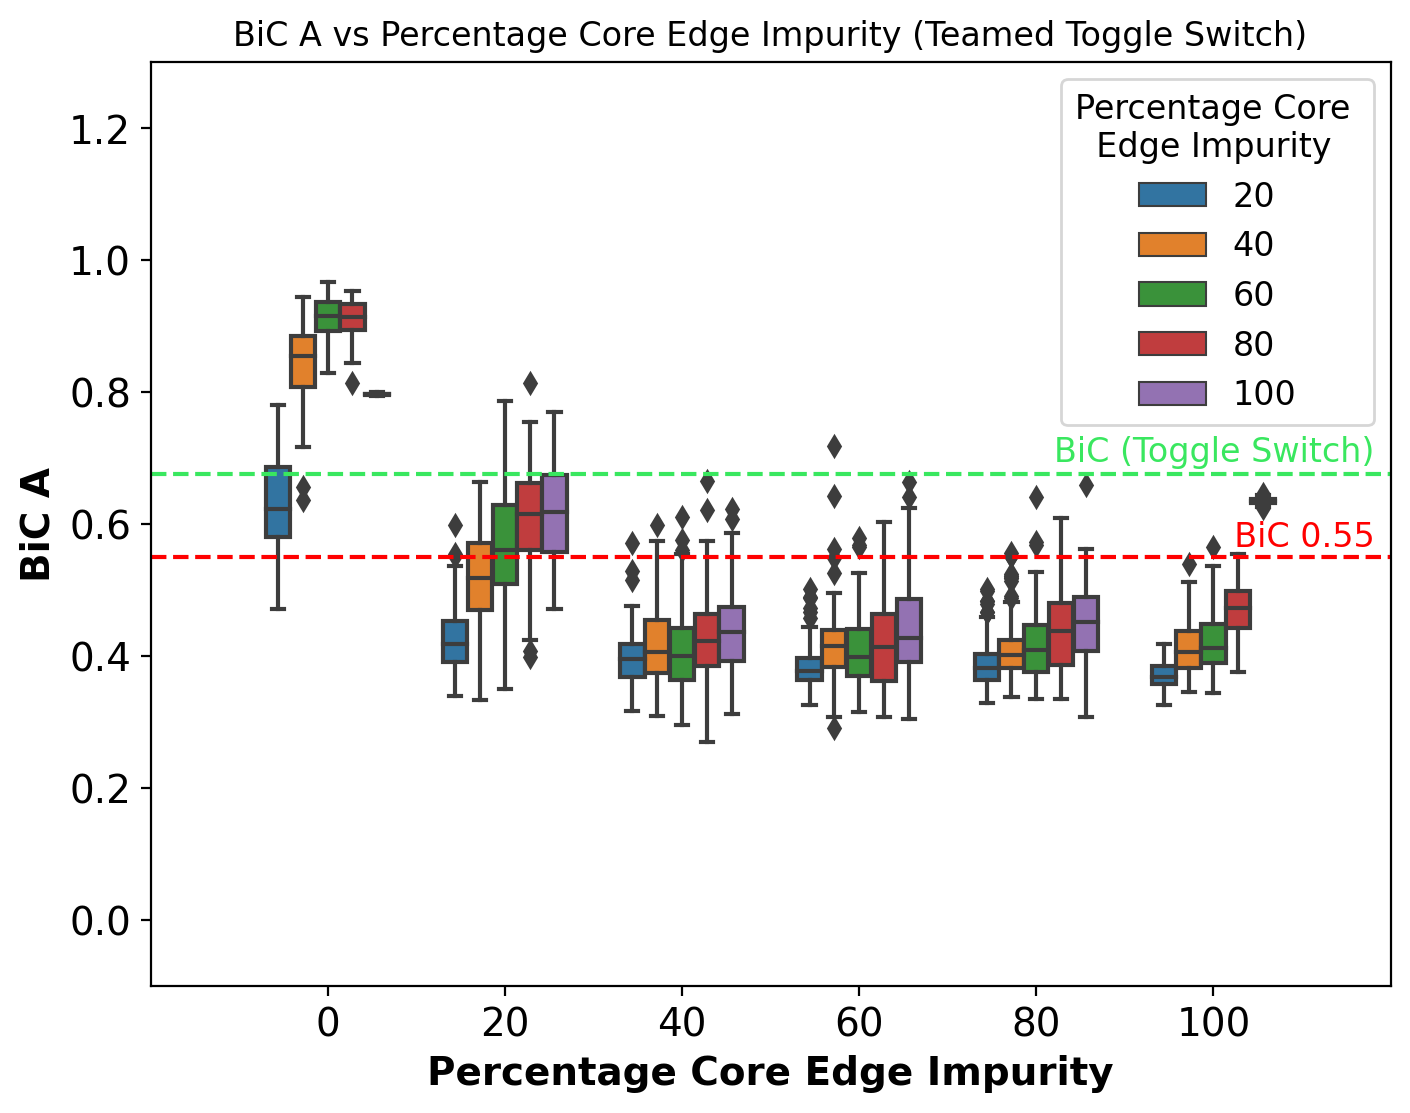

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC A'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue='Core_Density',
        x='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    plt.title(Metric+' vs Percentage Core Edge Impurity (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel(Metric, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.3)
    plt.xlim(-1,6)
    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(5, 0.58, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)
    
    plt.axhline(y=0.6769, linestyle='--', color='#39e75f')
    plt.text(4.1, 0.71, 'BiC (Toggle Switch)', color='#39e75f', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='upper right')
plt.savefig('impurity_density_plotting/BiC_A_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Switch.png')
plt.show()


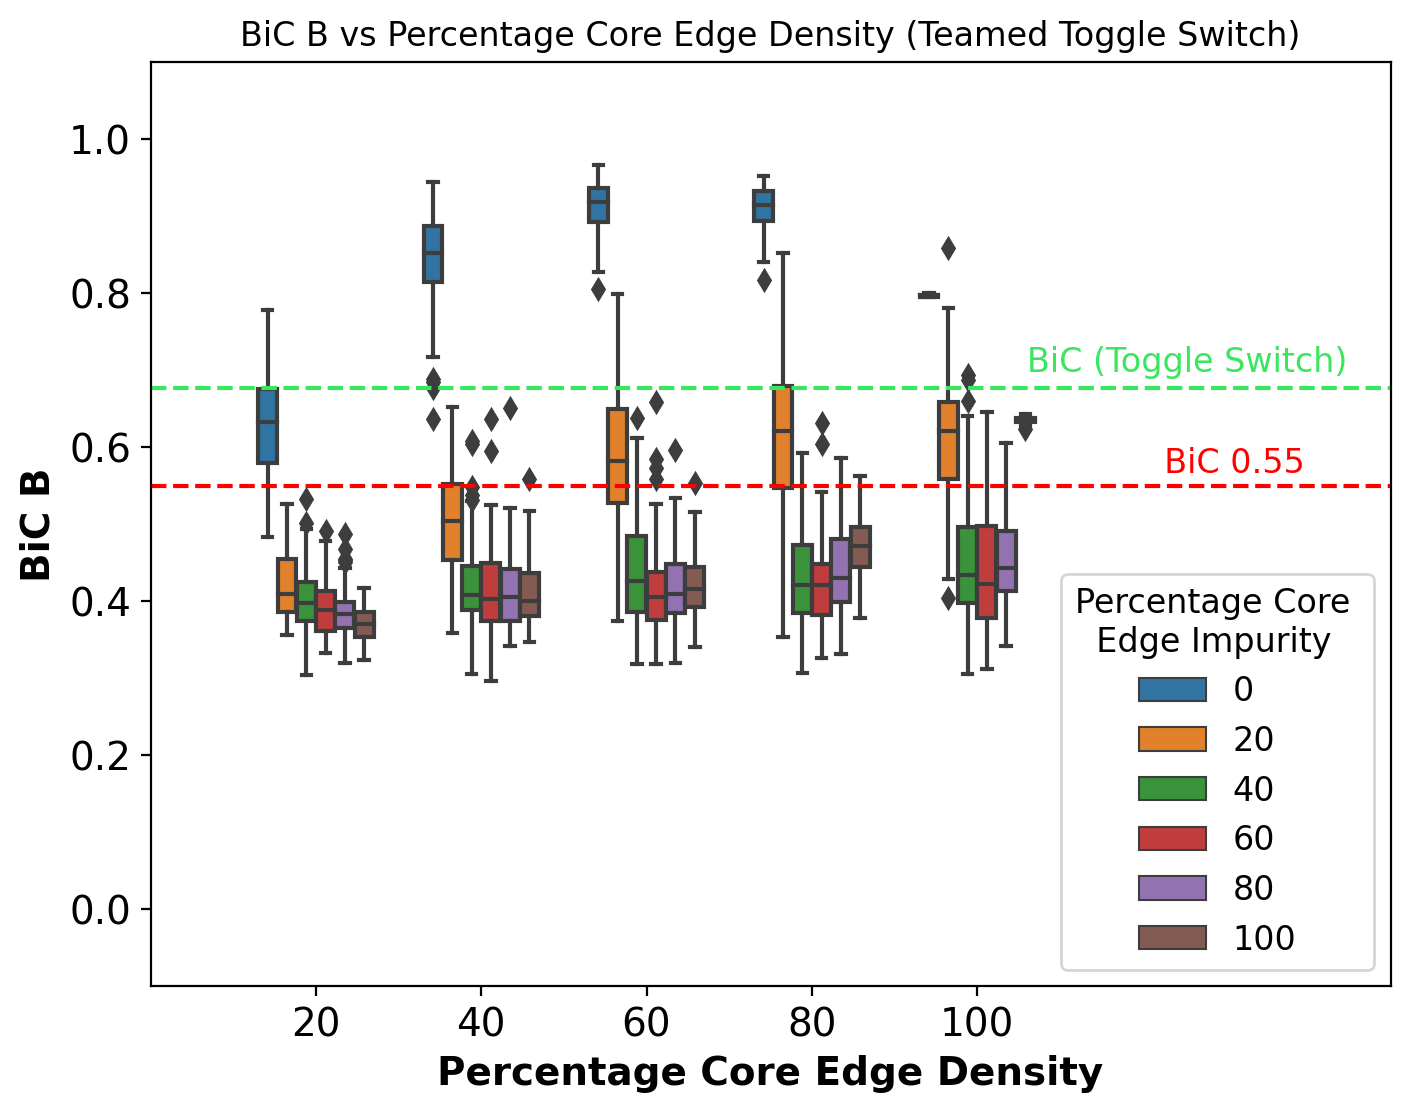

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC B'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    plt.title(Metric +' vs Percentage Core Edge Density (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel(Metric+'', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,6.5)
    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(5, 0.58, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)
    
    plt.axhline(y=0.6769, linestyle='--', color='#39e75f')
    plt.text(4.3, 0.71, 'BiC (Toggle Switch)', color='#39e75f', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='lower right')
plt.savefig('impurity_density_plotting/BiC_B_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Switch.png')
plt.show()


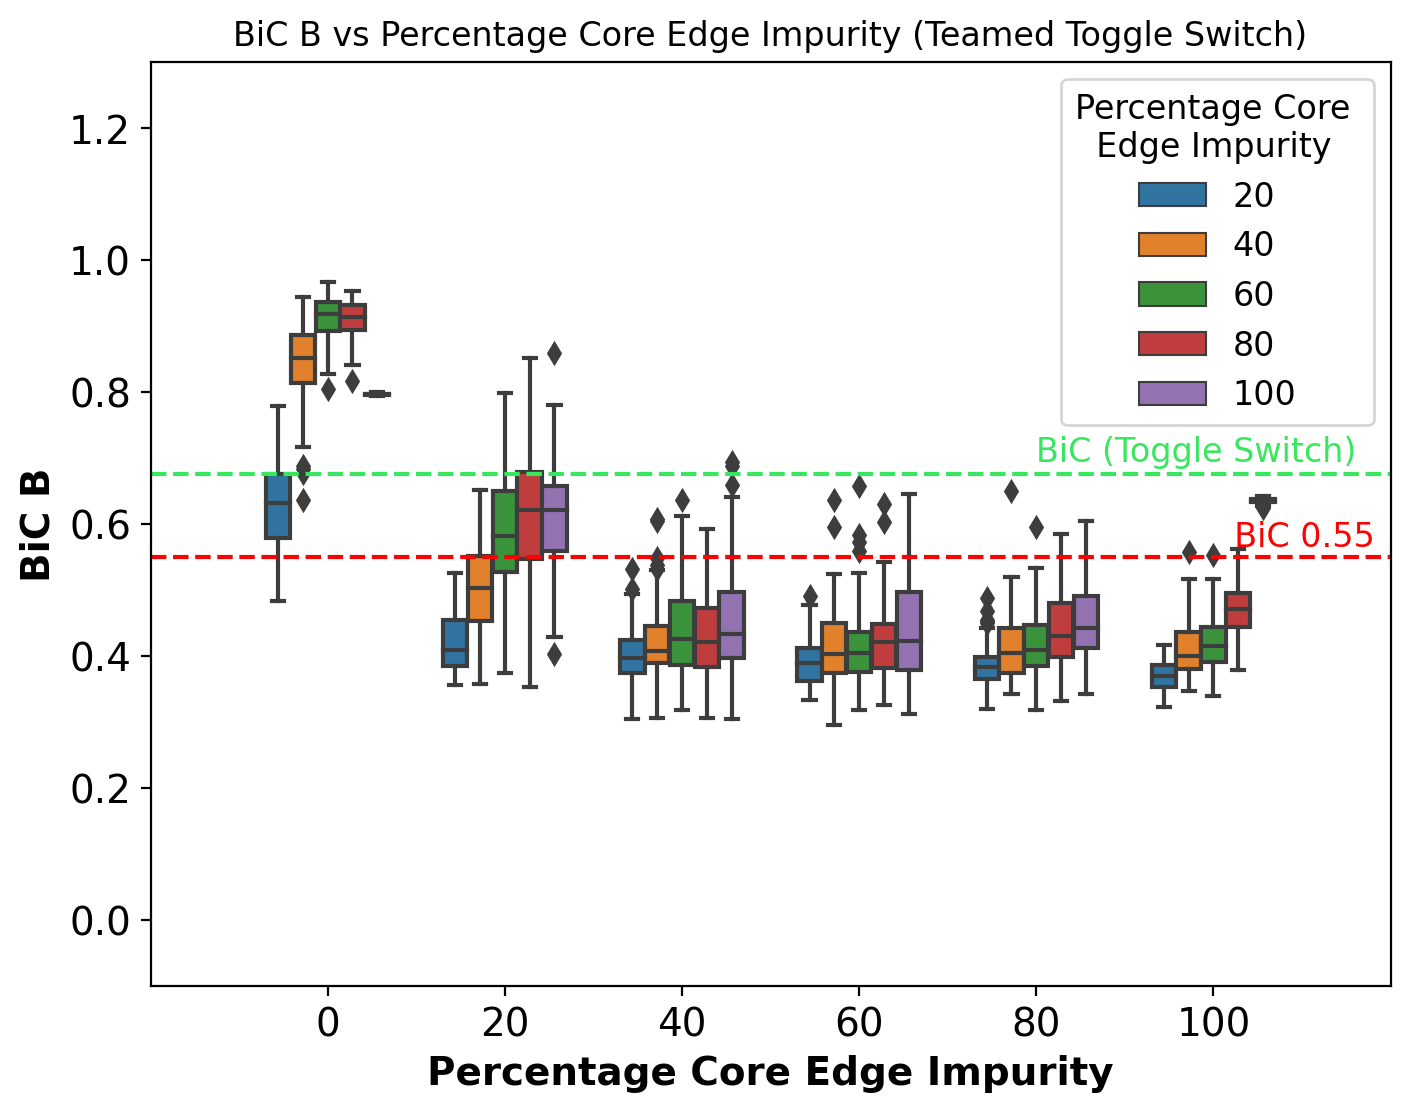

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC B'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue='Core_Density',
        x='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    plt.title(Metric+' vs Percentage Core Edge Impurity (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel(Metric, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.3)
    plt.xlim(-1,6)
    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(5, 0.58, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)
    
    plt.axhline(y=0.6769, linestyle='--', color='#39e75f')
    plt.text(4, 0.71, 'BiC (Toggle Switch)', color='#39e75f', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='upper right')
plt.savefig('impurity_density_plotting/BiC_B_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Switch.png')
plt.show()


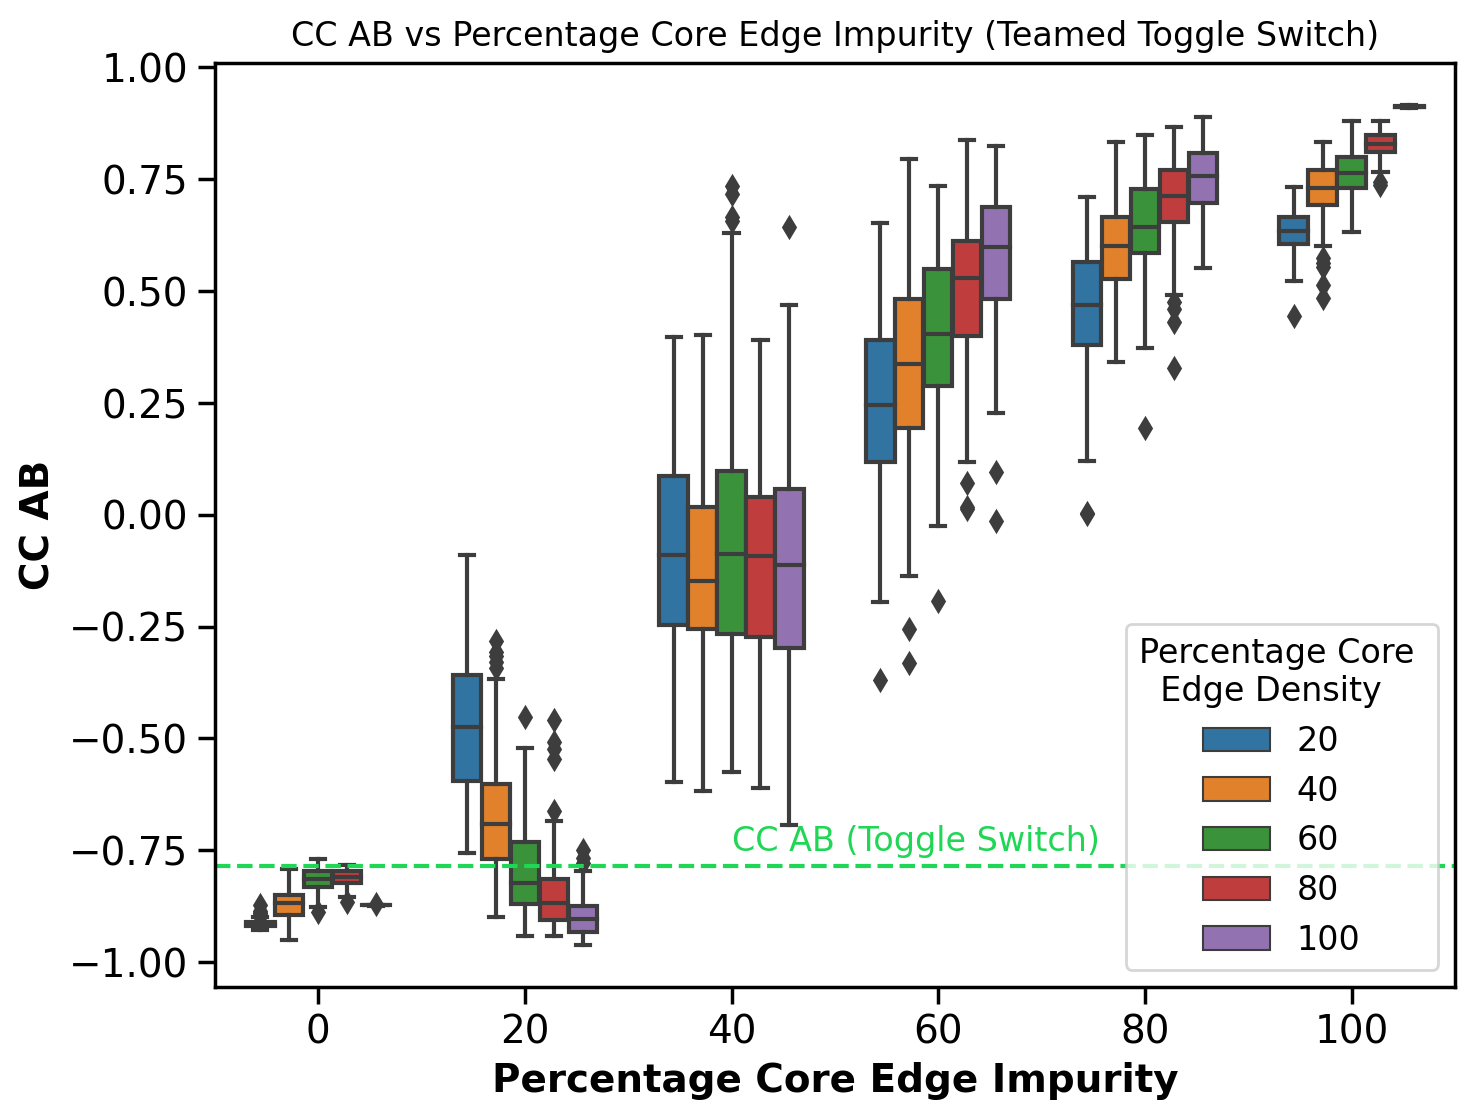

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'CC AB'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
# plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue='Core_Density',
        x='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    plt.title(Metric+' vs Percentage Core Edge Impurity (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel(Metric, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.axhline(y=-0.786, linestyle='--', color='#1fd655')
    plt.text(2, -0.73, 'CC AB (Toggle Switch)', color='#1fd655', ha='left', va='center', fontsize=12)
    # plt.ylim(-0.1, 1.3)
    # plt.xlim(-1,6)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Density', fontsize=12, loc='lower right')
plt.savefig('impurity_density_plotting/CC_AB_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Switch.png')
plt.show()


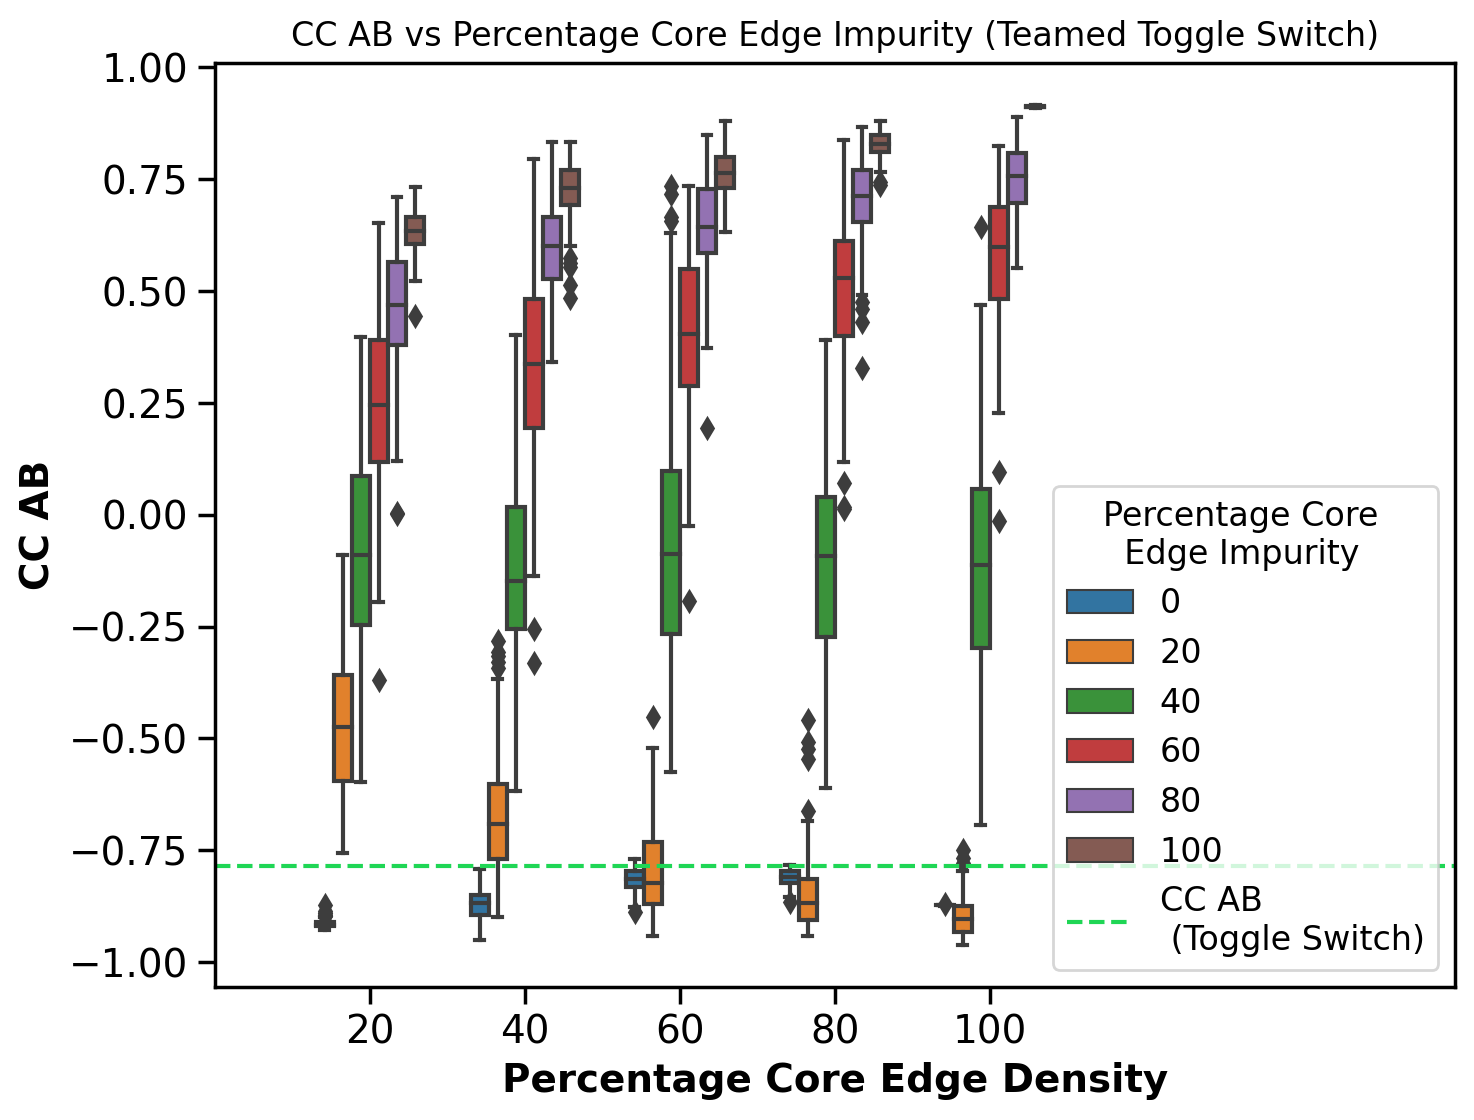

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'CC AB'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
# plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    plt.title(Metric+' vs Percentage Core Edge Impurity (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel(Metric, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # plt.ylim(-0.1, 1.3)
    plt.xlim(-1,7)
    plt.axhline(y=-0.786, linestyle='--', color='#1fd655', label = 'CC AB \n (Toggle Switch)')
    # plt.text(2, -0.73, 'CC AB (Toggle Switch)', color='#1fd655', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='lower right')
plt.savefig('impurity_density_plotting/CC_AB_vs_Percentage_Core_Edge_DensityTeamed_Toggle_Switch.png')
plt.show()


In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'Team Strength'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
# plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    plt.title(Metric+' vs Percentage Core Edge Density (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel(Metric, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.3)
    plt.xlim(-1,6)
    plt.axhline(y=1, linestyle='--', color='#1fd655')
    plt.text(0, 1.04, 'Team Strength (Toggle Switch)', color='#1fd655', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='upper right')
plt.savefig('impurity_density_plotting/Team_Strength_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Switch.png')
plt.show()


ValueError: Could not interpret input 'Team Strength'

<Figure size 1600x1200 with 0 Axes>

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'Team Strength'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
# plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue='Core_Density',
        x='Percentage_Impurity',
        data=melt_table_complete,
        width=0.7
    )

    plt.title(Metric+' vs Percentage Core Edge Impurity (Teamed Toggle Switch)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel(Metric, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.3)
    plt.xlim(-1,6)
    plt.axhline(y=1, linestyle='--', color='#1fd655')
    plt.text(0, 1.04, 'Team Strength (Toggle Switch)', color='#1fd655', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Denisty', fontsize=12, loc='upper right')
plt.savefig('impurity_density_plotting/Team_Strength_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Switch.png')
plt.show()


ValueError: Could not interpret input 'Team Strength'

<Figure size 1600x1200 with 0 Axes>

In [237]:
melt_table_complete

index             Type  Core_Density  \
0    0Indegree20% Density_0 Nodes_0 Edges_0  Lowered Density            20   
1    0Indegree20% Density_0 Nodes_0 Edges_1  Lowered Density            20   
2    0Indegree20% Density_0 Nodes_0 Edges_2  Lowered Density            20   
3    0Indegree20% Density_0 Nodes_0 Edges_3  Lowered Density            20   
4    0Indegree20% Density_0 Nodes_0 Edges_4  Lowered Density            20   
..                                      ...              ...           ...   
5   0Indegree100% Density_0 Nodes_0 Edges_5  Lowered Density           100   
6   0Indegree100% Density_0 Nodes_0 Edges_6  Lowered Density           100   
7   0Indegree100% Density_0 Nodes_0 Edges_7  Lowered Density           100   
8   0Indegree100% Density_0 Nodes_0 Edges_8  Lowered Density           100   
9   0Indegree100% Density_0 Nodes_0 Edges_9  Lowered Density           100   

   Peripheral_Nodes  Peripheral_Edges     BiC A     BiC B     CC AB  \
0           0 Nodes                 0  0.360508  0.351521  0.611713   
1           0 Nodes                 0  0.352921  0.360658  0.626797   
2           0 Nodes                 0  0.372417  0.386632  0.670843   
3           0 Nodes                 0  0.361877  0.353170  0.612533   
4           0 Nodes                 0  0.399494  0.402254  0.663785   
..              ...               ...       ...       ...       ...   
5           0 Nodes                 0  0.800119  0.799962 -0.869819   
6           0 Nodes                 0  0.795385  0.795455 -0.873501   
7           0 Nodes                 0  0.795211  0.795276 -0.872114   
8           0 Nodes                 0  0.797940  0.798141 -0.872319   
9           0 Nodes                 0  0.797525  0.797459 -0.871668   

    F1 (Average)  F1 (Strict)  Team Strength  Team Size  \
0       0.000062     0.000000          0.045          5   
1       0.000090     0.000000          0.043          5   
2       0.000077     0.000000          0.042          5   
3       0.000271     0.000000          0.045          5   
4       0.000148     0.000000          0.045          5   
..           ...          ...            ...        ...   
5       0.808440     0.778649          1.000          5   
6       0.803762     0.774866          1.000          5   
7       0.803665     0.776139          1.000          5   
8       0.806614     0.775681          1.000          5   
9       0.806029     0.777778          1.000          5   

    Number_of_Self_Activations  indegree Self Activation Status  \
0                            0         0   With Self Activation   
1                            0         0   With Self Activation   
2                            0         0   With Self Activation   
3                            0         0   With Self Activation   
4                            0         0   With Self Activation   
..                         ...       ...                    ...   
5                            0         0   With Self Activation   
6                            0         0   With Self Activation   
7                            0         0   With Self Activation   
8                            0         0   With Self Activation   
9                            0         0   With Self Activation   

    Percentage Impurity  Percentage_Impurity  
0                     0                  100  
1                     0                  100  
2                     0                  100  
3                     0                  100  
4                     0                  100  
..                  ...                  ...  
5                     0                    0  
6                     0                    0  
7                     0                    0  
8                     0                    0  
9                     0                    0  

[2910 rows x 17 columns]

In [242]:
melt_table_complete = melt_table_complete.rename(columns={

                                      'Team Strength':'Team_Strength'})

melt_table_complete

index             Type  Core_Density  \
0    0Indegree20% Density_0 Nodes_0 Edges_0  Lowered Density            20   
1    0Indegree20% Density_0 Nodes_0 Edges_1  Lowered Density            20   
2    0Indegree20% Density_0 Nodes_0 Edges_2  Lowered Density            20   
3    0Indegree20% Density_0 Nodes_0 Edges_3  Lowered Density            20   
4    0Indegree20% Density_0 Nodes_0 Edges_4  Lowered Density            20   
..                                      ...              ...           ...   
5   0Indegree100% Density_0 Nodes_0 Edges_5  Lowered Density           100   
6   0Indegree100% Density_0 Nodes_0 Edges_6  Lowered Density           100   
7   0Indegree100% Density_0 Nodes_0 Edges_7  Lowered Density           100   
8   0Indegree100% Density_0 Nodes_0 Edges_8  Lowered Density           100   
9   0Indegree100% Density_0 Nodes_0 Edges_9  Lowered Density           100   

   Peripheral_Nodes  Peripheral_Edges     BiC A     BiC B     CC AB  \
0           0 Nodes                 0  0.360508  0.351521  0.611713   
1           0 Nodes                 0  0.352921  0.360658  0.626797   
2           0 Nodes                 0  0.372417  0.386632  0.670843   
3           0 Nodes                 0  0.361877  0.353170  0.612533   
4           0 Nodes                 0  0.399494  0.402254  0.663785   
..              ...               ...       ...       ...       ...   
5           0 Nodes                 0  0.800119  0.799962 -0.869819   
6           0 Nodes                 0  0.795385  0.795455 -0.873501   
7           0 Nodes                 0  0.795211  0.795276 -0.872114   
8           0 Nodes                 0  0.797940  0.798141 -0.872319   
9           0 Nodes                 0  0.797525  0.797459 -0.871668   

    F1 (Average)  F1 (Strict)  Team_Strength  Team Size  \
0       0.000062     0.000000          0.045          5   
1       0.000090     0.000000          0.043          5   
2       0.000077     0.000000          0.042          5   
3       0.000271     0.000000          0.045          5   
4       0.000148     0.000000          0.045          5   
..           ...          ...            ...        ...   
5       0.808440     0.778649          1.000          5   
6       0.803762     0.774866          1.000          5   
7       0.803665     0.776139          1.000          5   
8       0.806614     0.775681          1.000          5   
9       0.806029     0.777778          1.000          5   

    Number_of_Self_Activations  indegree Self Activation Status  \
0                            0         0   With Self Activation   
1                            0         0   With Self Activation   
2                            0         0   With Self Activation   
3                            0         0   With Self Activation   
4                            0         0   With Self Activation   
..                         ...       ...                    ...   
5                            0         0   With Self Activation   
6                            0         0   With Self Activation   
7                            0         0   With Self Activation   
8                            0         0   With Self Activation   
9                            0         0   With Self Activation   

    Percentage Impurity  Percentage_Impurity  
0                     0                  100  
1                     0                  100  
2                     0                  100  
3                     0                  100  
4                     0                  100  
..                  ...                  ...  
5                     0                    0  
6                     0                    0  
7                     0                    0  
8                     0                    0  
9                     0                    0  

[2910 rows x 17 columns]

In [264]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sample data

model = ols('Team_Strength ~ C(Core_Density) + C(Percentage_Impurity) + C(Core_Density):C(Percentage_Impurity)', data=melt_table_complete).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df              F  \
C(Core_Density)                           0.529540     4.0     267.306498   
C(Percentage_Impurity)                  264.645019     5.0  106872.221909   
C(Core_Density):C(Percentage_Impurity)    2.713392    20.0     273.938842   
Residual                                  1.426334  2880.0            NaN   

                                               PR(>F)  
C(Core_Density)                         1.380237e-195  
C(Percentage_Impurity)                   0.000000e+00  
C(Core_Density):C(Percentage_Impurity)   0.000000e+00  
Residual                                          NaN

In [240]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming melt_table_complete is your DataFrame containing the required data

# Fit the ANOVA model
model = ols('`Team Strength` ~ C(Core_Density) + C(Percentage_Impurity) + C(Core_Density):C(Percentage_Impurity)', data=melt_table_complete).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


PatsyError: error tokenizing input (maybe an unclosed string?)
    `Team Strength` ~ C(Core_Density) + C(Percentage_Impurity) + C(Core_Density):C(Percentage_Impurity)
    ^

In [137]:
melt_table_complete

index             Type  Core_Density  \
0    0Indegree20% Density_0 Nodes_0 Edges_0  Lowered Density            20   
1    0Indegree20% Density_0 Nodes_0 Edges_1  Lowered Density            20   
2    0Indegree20% Density_0 Nodes_0 Edges_2  Lowered Density            20   
3    0Indegree20% Density_0 Nodes_0 Edges_3  Lowered Density            20   
4    0Indegree20% Density_0 Nodes_0 Edges_4  Lowered Density            20   
..                                      ...              ...           ...   
5   0Indegree100% Density_0 Nodes_0 Edges_5  Lowered Density           100   
6   0Indegree100% Density_0 Nodes_0 Edges_6  Lowered Density           100   
7   0Indegree100% Density_0 Nodes_0 Edges_7  Lowered Density           100   
8   0Indegree100% Density_0 Nodes_0 Edges_8  Lowered Density           100   
9   0Indegree100% Density_0 Nodes_0 Edges_9  Lowered Density           100   

   Peripheral_Nodes  Peripheral_Edges     BiC A     BiC B     CC AB  \
0           0 Nodes                 0  0.360508  0.351521  0.611713   
1           0 Nodes                 0  0.352921  0.360658  0.626797   
2           0 Nodes                 0  0.372417  0.386632  0.670843   
3           0 Nodes                 0  0.361877  0.353170  0.612533   
4           0 Nodes                 0  0.399494  0.402254  0.663785   
..              ...               ...       ...       ...       ...   
5           0 Nodes                 0  0.800119  0.799962 -0.869819   
6           0 Nodes                 0  0.795385  0.795455 -0.873501   
7           0 Nodes                 0  0.795211  0.795276 -0.872114   
8           0 Nodes                 0  0.797940  0.798141 -0.872319   
9           0 Nodes                 0  0.797525  0.797459 -0.871668   

    F1 (Average)  F1 (Strict)  Team Strength  Team Size  \
0       0.000062     0.000000          0.045          5   
1       0.000090     0.000000          0.043          5   
2       0.000077     0.000000          0.042          5   
3       0.000271     0.000000          0.045          5   
4       0.000148     0.000000          0.045          5   
..           ...          ...            ...        ...   
5       0.808440     0.778649          1.000          5   
6       0.803762     0.774866          1.000          5   
7       0.803665     0.776139          1.000          5   
8       0.806614     0.775681          1.000          5   
9       0.806029     0.777778          1.000          5   

    Number_of_Self_Activations  indegree Self Activation Status  \
0                            0         0   With Self Activation   
1                            0         0   With Self Activation   
2                            0         0   With Self Activation   
3                            0         0   With Self Activation   
4                            0         0   With Self Activation   
..                         ...       ...                    ...   
5                            0         0   With Self Activation   
6                            0         0   With Self Activation   
7                            0         0   With Self Activation   
8                            0         0   With Self Activation   
9                            0         0   With Self Activation   

    Percentage Impurity  Percentage_Impurity  
0                     0                  100  
1                     0                  100  
2                     0                  100  
3                     0                  100  
4                     0                  100  
..                  ...                  ...  
5                     0                    0  
6                     0                    0  
7                     0                    0  
8                     0                    0  
9                     0                    0  

[2910 rows x 17 columns]

In [267]:
melt_table_complete

index             Type  Core_Density  \
0    0Indegree20% Density_0 Nodes_0 Edges_0  Lowered Density            20   
1    0Indegree20% Density_0 Nodes_0 Edges_1  Lowered Density            20   
2    0Indegree20% Density_0 Nodes_0 Edges_2  Lowered Density            20   
3    0Indegree20% Density_0 Nodes_0 Edges_3  Lowered Density            20   
4    0Indegree20% Density_0 Nodes_0 Edges_4  Lowered Density            20   
..                                      ...              ...           ...   
5   0Indegree100% Density_0 Nodes_0 Edges_5  Lowered Density           100   
6   0Indegree100% Density_0 Nodes_0 Edges_6  Lowered Density           100   
7   0Indegree100% Density_0 Nodes_0 Edges_7  Lowered Density           100   
8   0Indegree100% Density_0 Nodes_0 Edges_8  Lowered Density           100   
9   0Indegree100% Density_0 Nodes_0 Edges_9  Lowered Density           100   

   Peripheral_Nodes  Peripheral_Edges     BiC A     BiC B     CC AB  \
0           0 Nodes                 0  0.360508  0.351521  0.611713   
1           0 Nodes                 0  0.352921  0.360658  0.626797   
2           0 Nodes                 0  0.372417  0.386632  0.670843   
3           0 Nodes                 0  0.361877  0.353170  0.612533   
4           0 Nodes                 0  0.399494  0.402254  0.663785   
..              ...               ...       ...       ...       ...   
5           0 Nodes                 0  0.800119  0.799962 -0.869819   
6           0 Nodes                 0  0.795385  0.795455 -0.873501   
7           0 Nodes                 0  0.795211  0.795276 -0.872114   
8           0 Nodes                 0  0.797940  0.798141 -0.872319   
9           0 Nodes                 0  0.797525  0.797459 -0.871668   

    F1 (Average)  F1 (Strict)  Team_Strength  Team Size  \
0       0.000062     0.000000          0.045          5   
1       0.000090     0.000000          0.043          5   
2       0.000077     0.000000          0.042          5   
3       0.000271     0.000000          0.045          5   
4       0.000148     0.000000          0.045          5   
..           ...          ...            ...        ...   
5       0.808440     0.778649          1.000          5   
6       0.803762     0.774866          1.000          5   
7       0.803665     0.776139          1.000          5   
8       0.806614     0.775681          1.000          5   
9       0.806029     0.777778          1.000          5   

    Number_of_Self_Activations  indegree Self Activation Status  \
0                            0         0   With Self Activation   
1                            0         0   With Self Activation   
2                            0         0   With Self Activation   
3                            0         0   With Self Activation   
4                            0         0   With Self Activation   
..                         ...       ...                    ...   
5                            0         0   With Self Activation   
6                            0         0   With Self Activation   
7                            0         0   With Self Activation   
8                            0         0   With Self Activation   
9                            0         0   With Self Activation   

    Percentage Impurity  Percentage_Impurity  
0                     0                  100  
1                     0                  100  
2                     0                  100  
3                     0                  100  
4                     0                  100  
..                  ...                  ...  
5                     0                    0  
6                     0                    0  
7                     0                    0  
8                     0                    0  
9                     0                    0  

[2910 rows x 17 columns]

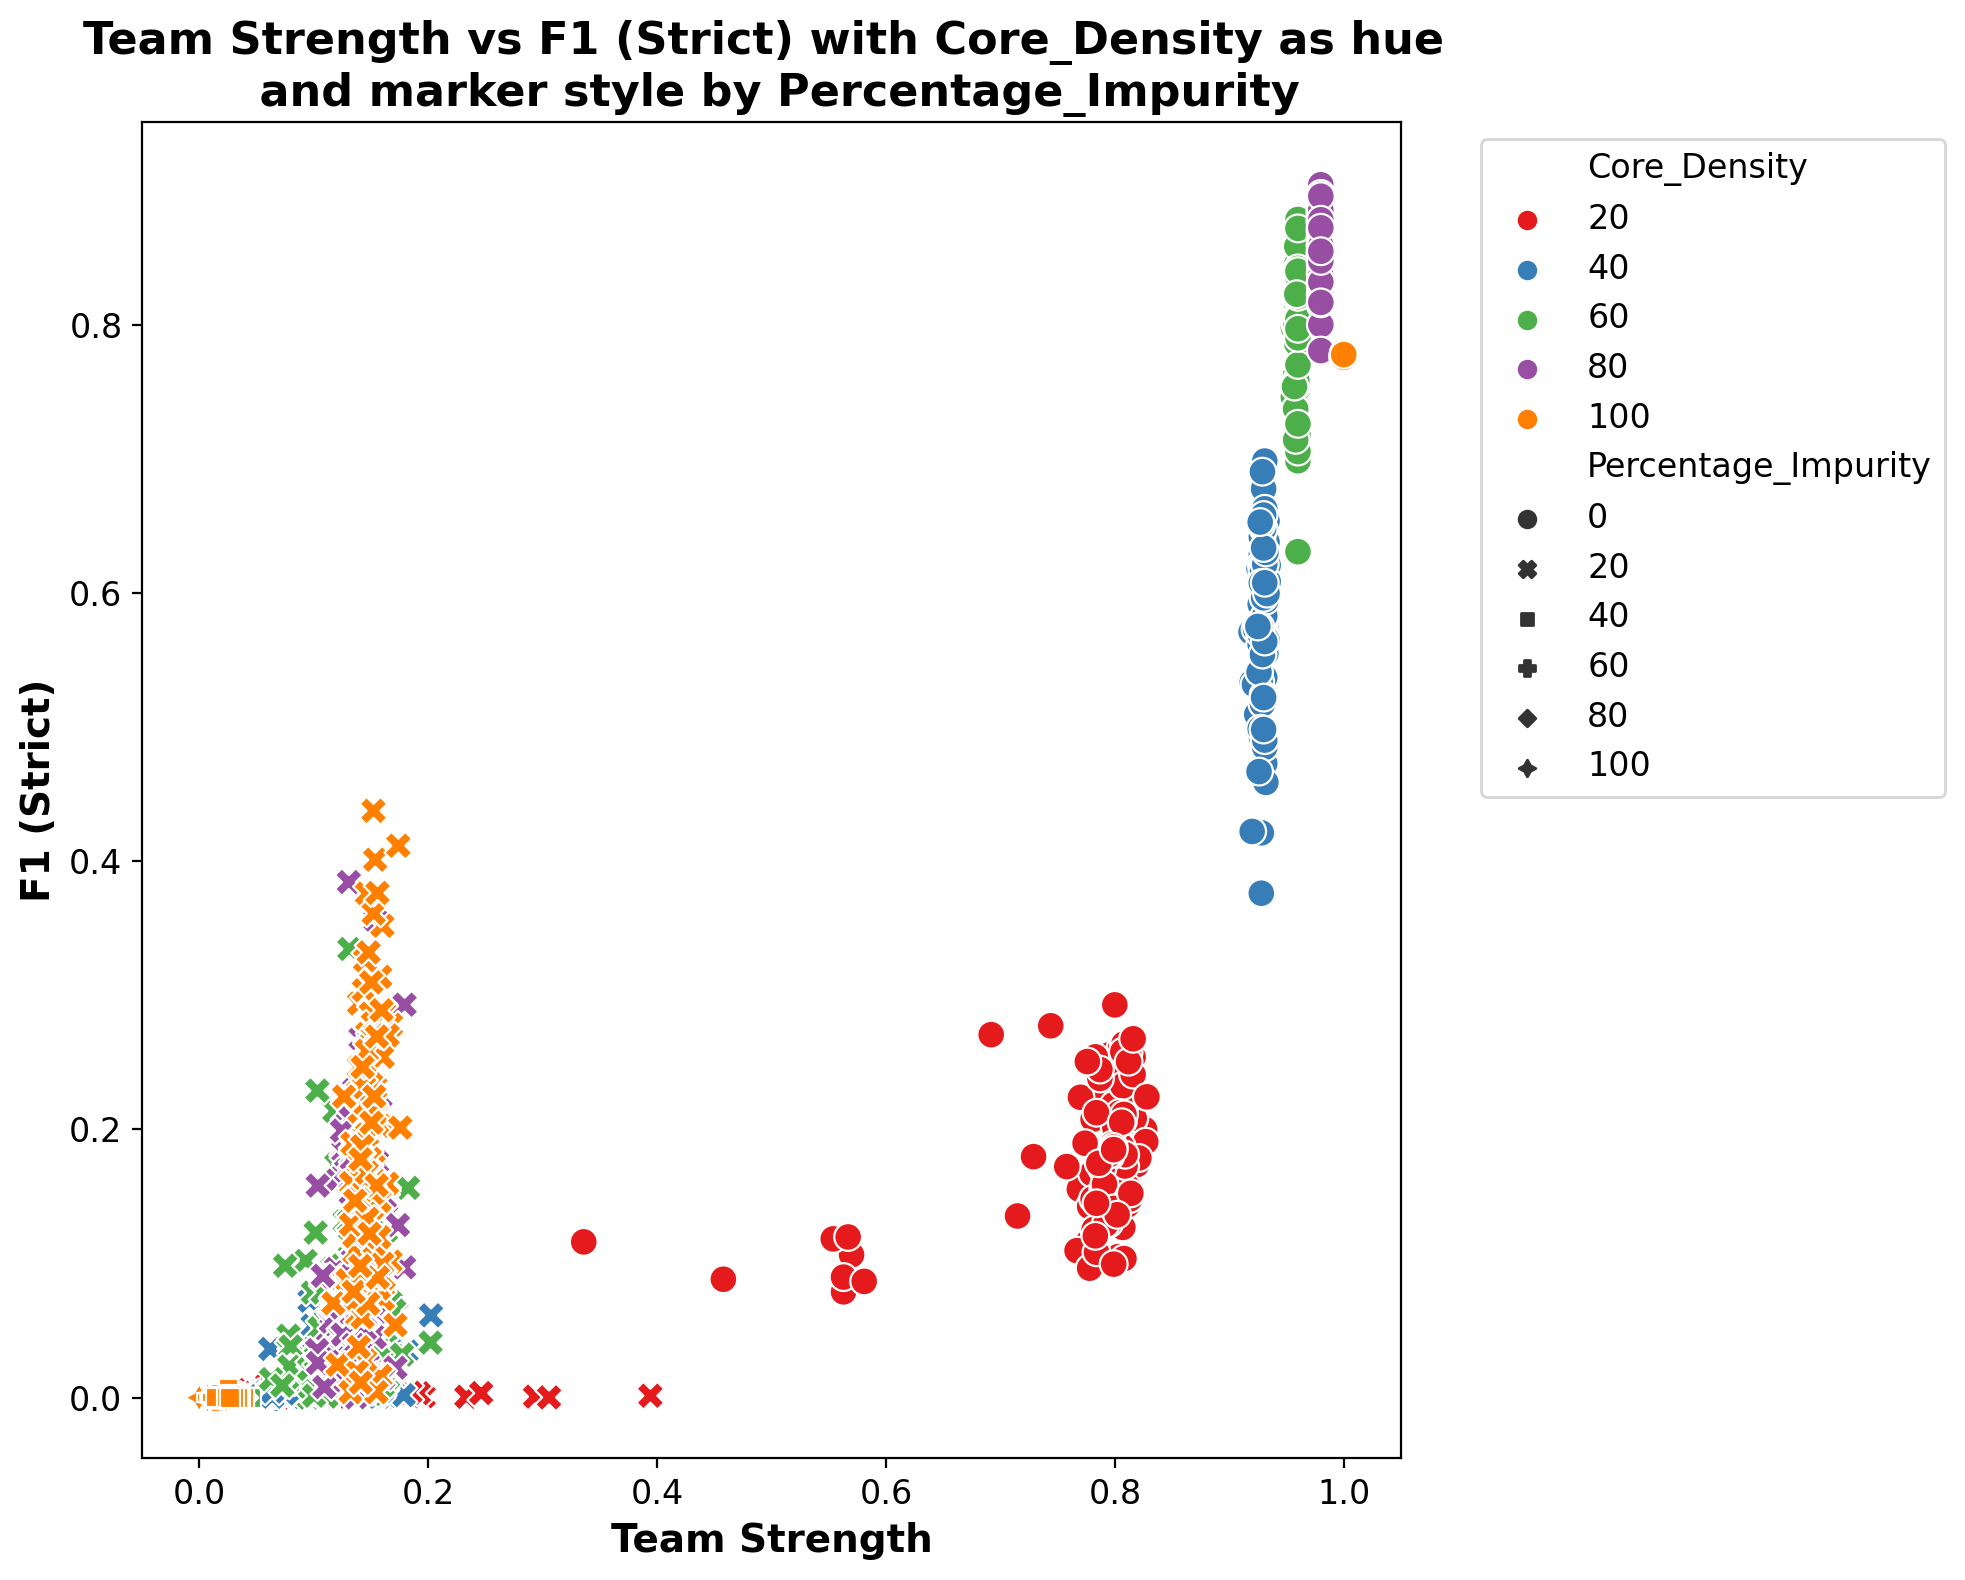

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

# Set the figure size and DPI
plt.figure(figsize=(10, 8), dpi=200)

# Create scatter plot with custom marker types and hue
sns.scatterplot(data=melt_table_complete, x='Team_Strength', y='F1 (Strict)', hue='Core_Density', style='Percentage_Impurity', palette='Set1', s=100)

# Set title and labels with specified formats and font sizes
plt.title('Team Strength vs F1 (Strict) with Core_Density as hue \n and marker style by Percentage_Impurity', fontsize=16, fontweight='bold')
plt.xlabel('Team Strength', fontsize=14, fontweight='bold')
plt.ylabel('F1 (Strict)', fontsize=14, fontweight='bold')

# Set tick font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show legend outside the plot
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('impurity_density_plotting/Team_Strength_vs_F1_Strict_with_Core_Density_as_hue_and_marker_style_by_Percentage_Impurity.png')
# Show plot
plt.show()


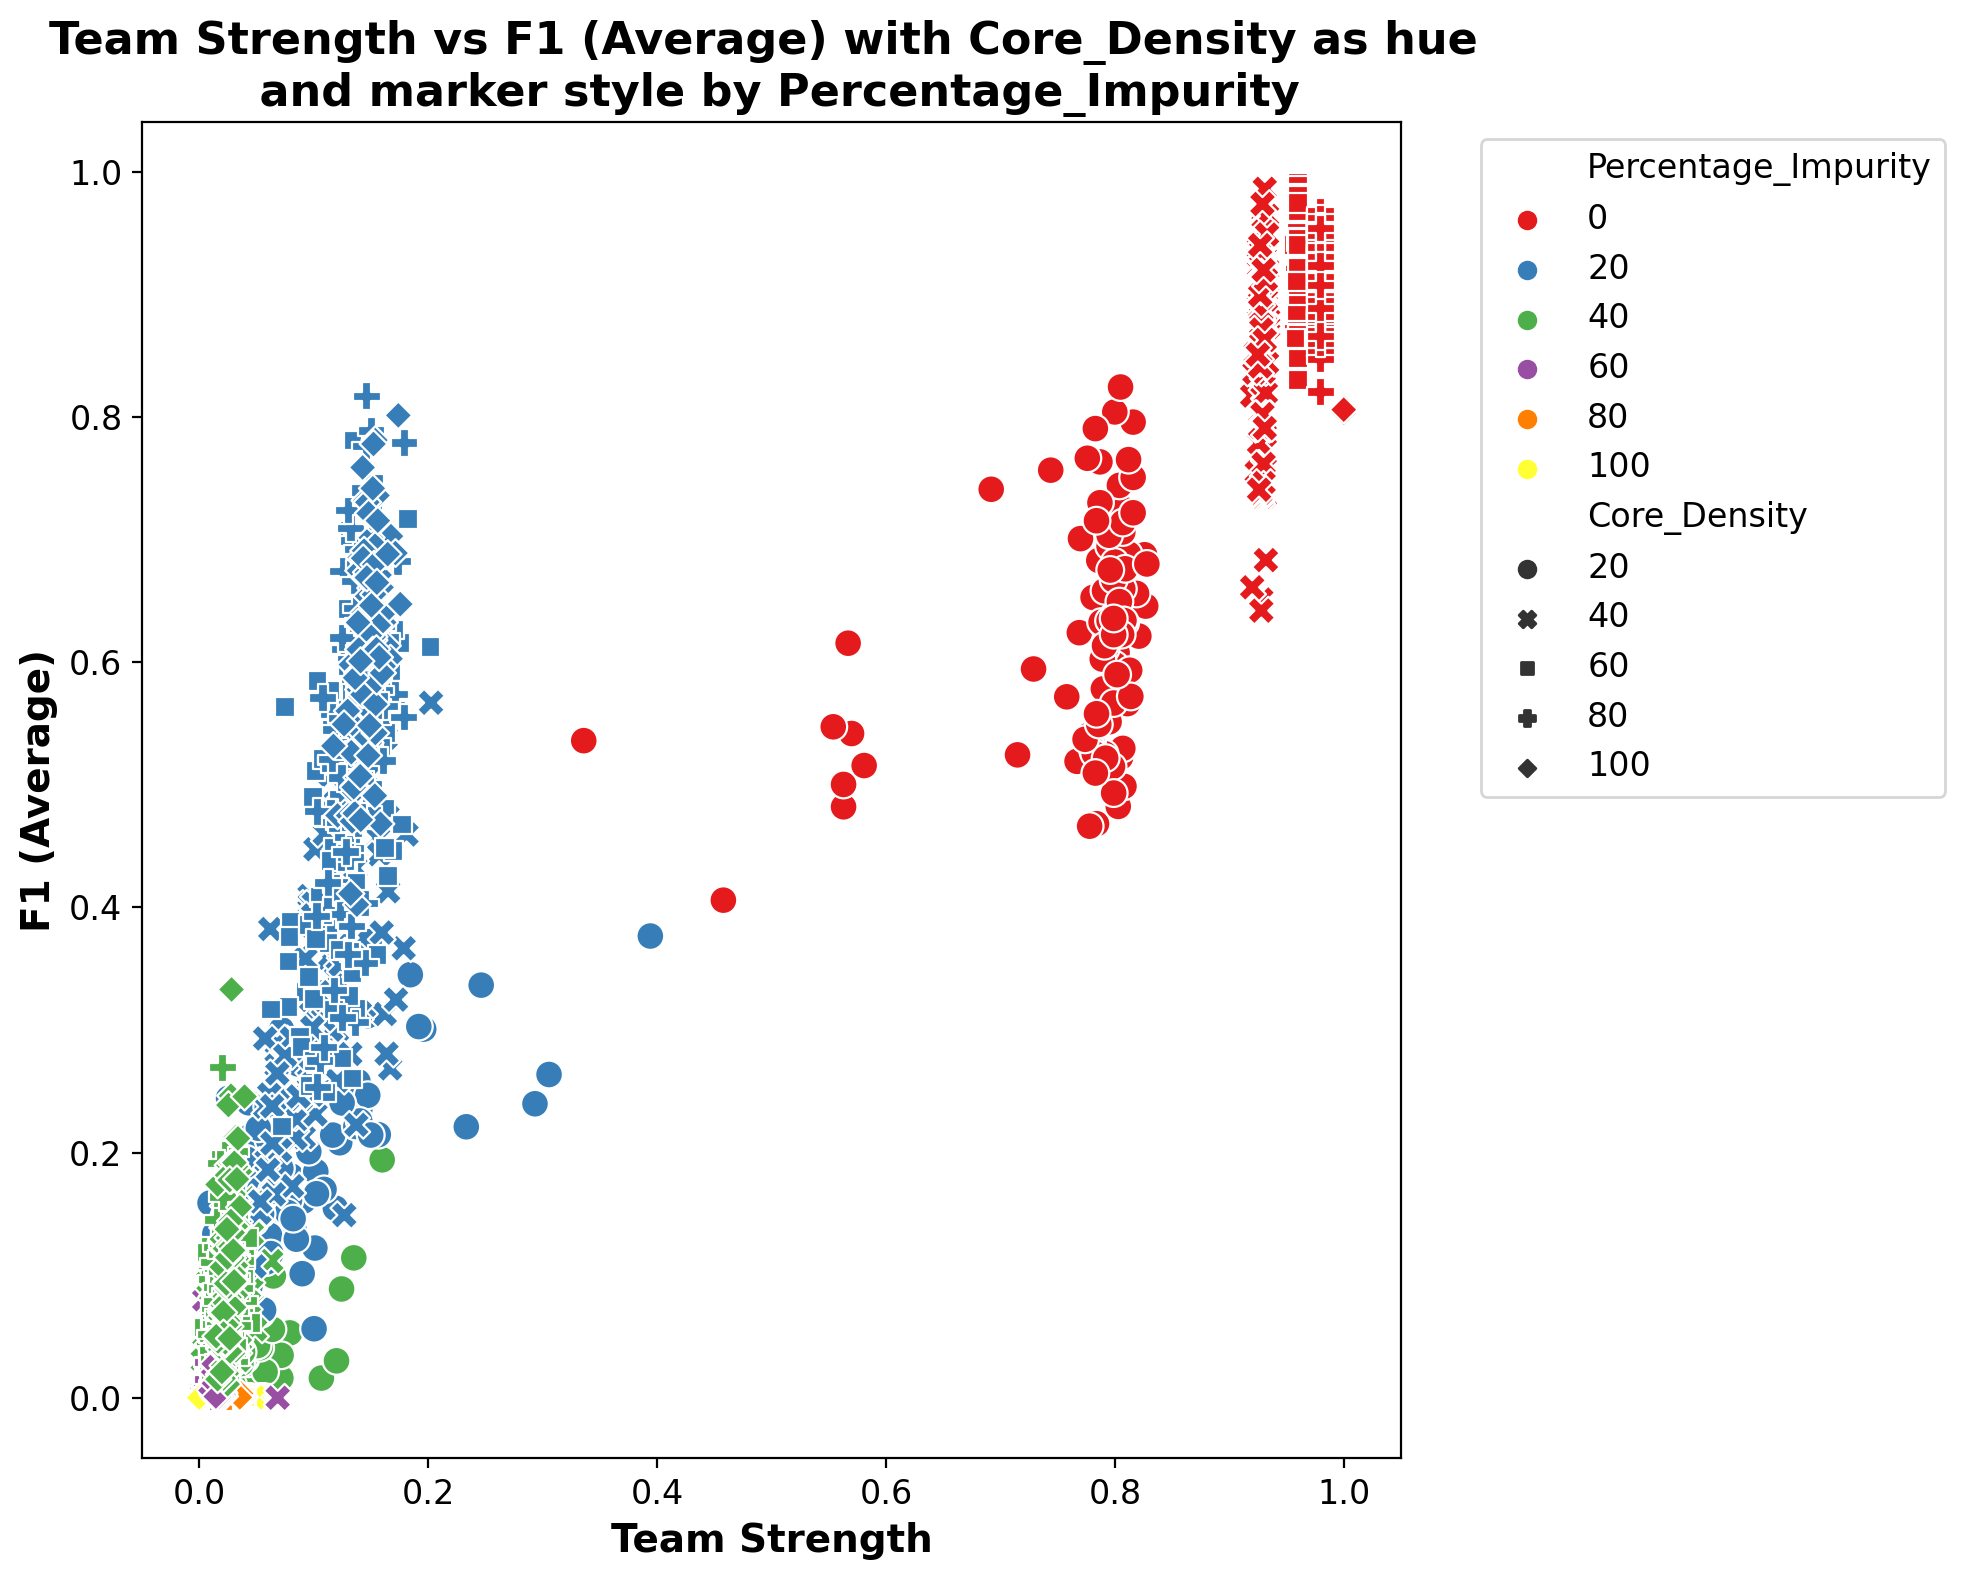

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

# Set the figure size and DPI
plt.figure(figsize=(10, 8), dpi=200)

# Create scatter plot with custom marker types and hue
sns.scatterplot(data=melt_table_complete, x='Team_Strength', y='F1 (Average)', hue='Percentage_Impurity', style='Core_Density', palette='Set1', s=100)

# Set title and labels with specified formats and font sizes
plt.title('Team Strength vs F1 (Average) with Core_Density as hue \n and marker style by Percentage_Impurity', fontsize=16, fontweight='bold')
plt.xlabel('Team Strength', fontsize=14, fontweight='bold')
plt.ylabel('F1 (Average)', fontsize=14, fontweight='bold')

# Set tick font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show legend outside the plot
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('impurity_density_plotting/Team_Strength_vs_F1_Average_with_Core_Density_as_hue_and_marker_style_by_Percentage_Impurity.png')
# Show plot

plt.show()


In [286]:
melt_table_complete

index             Type  Core_Density  \
0    0Indegree20% Density_0 Nodes_0 Edges_0  Lowered Density            20   
1    0Indegree20% Density_0 Nodes_0 Edges_1  Lowered Density            20   
2    0Indegree20% Density_0 Nodes_0 Edges_2  Lowered Density            20   
3    0Indegree20% Density_0 Nodes_0 Edges_3  Lowered Density            20   
4    0Indegree20% Density_0 Nodes_0 Edges_4  Lowered Density            20   
..                                      ...              ...           ...   
5   0Indegree100% Density_0 Nodes_0 Edges_5  Lowered Density           100   
6   0Indegree100% Density_0 Nodes_0 Edges_6  Lowered Density           100   
7   0Indegree100% Density_0 Nodes_0 Edges_7  Lowered Density           100   
8   0Indegree100% Density_0 Nodes_0 Edges_8  Lowered Density           100   
9   0Indegree100% Density_0 Nodes_0 Edges_9  Lowered Density           100   

   Peripheral_Nodes  Peripheral_Edges     BiC A     BiC B     CC AB  \
0           0 Nodes                 0  0.360508  0.351521  0.611713   
1           0 Nodes                 0  0.352921  0.360658  0.626797   
2           0 Nodes                 0  0.372417  0.386632  0.670843   
3           0 Nodes                 0  0.361877  0.353170  0.612533   
4           0 Nodes                 0  0.399494  0.402254  0.663785   
..              ...               ...       ...       ...       ...   
5           0 Nodes                 0  0.800119  0.799962 -0.869819   
6           0 Nodes                 0  0.795385  0.795455 -0.873501   
7           0 Nodes                 0  0.795211  0.795276 -0.872114   
8           0 Nodes                 0  0.797940  0.798141 -0.872319   
9           0 Nodes                 0  0.797525  0.797459 -0.871668   

    F1 (Average)  F1 (Strict)  Team_Strength  Team Size  \
0       0.000062     0.000000          0.045          5   
1       0.000090     0.000000          0.043          5   
2       0.000077     0.000000          0.042          5   
3       0.000271     0.000000          0.045          5   
4       0.000148     0.000000          0.045          5   
..           ...          ...            ...        ...   
5       0.808440     0.778649          1.000          5   
6       0.803762     0.774866          1.000          5   
7       0.803665     0.776139          1.000          5   
8       0.806614     0.775681          1.000          5   
9       0.806029     0.777778          1.000          5   

    Number_of_Self_Activations  indegree Self Activation Status  \
0                            0         0   With Self Activation   
1                            0         0   With Self Activation   
2                            0         0   With Self Activation   
3                            0         0   With Self Activation   
4                            0         0   With Self Activation   
..                         ...       ...                    ...   
5                            0         0   With Self Activation   
6                            0         0   With Self Activation   
7                            0         0   With Self Activation   
8                            0         0   With Self Activation   
9                            0         0   With Self Activation   

    Percentage Impurity  Percentage_Impurity  
0                     0                  100  
1                     0                  100  
2                     0                  100  
3                     0                  100  
4                     0                  100  
..                  ...                  ...  
5                     0                    0  
6                     0                    0  
7                     0                    0  
8                     0                    0  
9                     0                    0  

[2910 rows x 17 columns]

In [52]:
triad_impurity_density = pd.read_csv('Triad_Impurity_and_Density/Triad_Imurity_and_Density_Master_march_26_Z_only.csv')

In [53]:
triad_impurity_density 

Unnamed: 0                            index             Type  \
0              0   100% Density_0 Nodes_0 Edges_0  Lowered Density   
1              1   100% Density_0 Nodes_0 Edges_1  Lowered Density   
2              2   100% Density_0 Nodes_0 Edges_2  Lowered Density   
3              3   100% Density_0 Nodes_0 Edges_3  Lowered Density   
4              4   100% Density_0 Nodes_0 Edges_4  Lowered Density   
...          ...                              ...              ...   
2995          95  100% Density_0 Nodes_0 Edges_95  Lowered Density   
2996          96  100% Density_0 Nodes_0 Edges_96  Lowered Density   
2997          97  100% Density_0 Nodes_0 Edges_97  Lowered Density   
2998          98  100% Density_0 Nodes_0 Edges_98  Lowered Density   
2999          99  100% Density_0 Nodes_0 Edges_99  Lowered Density   

      Core_Density Peripheral_Nodes Peripheral_Edges     BiC A     BiC B  \
0               20          0 Nodes          0 Edges  0.593888  0.546681   
1               20          0 Nodes          0 Edges  0.516754  0.472518   
2               20          0 Nodes          0 Edges  0.573675  0.558886   
3               20          0 Nodes          0 Edges  0.534503  0.581026   
4               20          0 Nodes          0 Edges  0.562890  0.538094   
...            ...              ...              ...       ...       ...   
2995           100          0 Nodes          0 Edges  0.940448  0.941763   
2996           100          0 Nodes          0 Edges  0.936995  0.936592   
2997           100          0 Nodes          0 Edges  0.940049  0.942199   
2998           100          0 Nodes          0 Edges  0.942067  0.942768   
2999           100          0 Nodes          0 Edges  0.939608  0.941393   

         BiC C     CC AB  ...  Team Strength  in_degree_Team_A  \
0     0.585464 -0.422619  ...              0                 0   
1     0.533711 -0.424832  ...              0                 0   
2     0.592185 -0.437602  ...              0                 0   
3     0.626791 -0.382923  ...              0                 0   
4     0.588664 -0.421571  ...              0                 0   
...        ...       ...  ...            ...               ...   
2995  0.940523  0.236403  ...              0                 0   
2996  0.937223  0.200723  ...              0                 0   
2997  0.940485  0.255156  ...              0                 0   
2998  0.940180  0.241423  ...              0                 0   
2999  0.941499  0.229136  ...              0                 0   

      in_degree_Team_B  in_degree_Team_C  Number_of_Self_Activations  \
0                    0                 0                           0   
1                    0                 0                           0   
2                    0                 0                           0   
3                    0                 0                           0   
4                    0                 0                           0   
...                ...               ...                         ...   
2995                 0                 0                           0   
2996                 0                 0                           0   
2997                 0                 0                           0   
2998                 0                 0                           0   
2999                 0                 0                           0   

      Average Indegree Per Core Node  Self Activation Status  Team_Size  \
0                                  0    With Self Activation          0   
1                                  0    With Self Activation          0   
2                                  0    With Self Activation          0   
3                                  0    With Self Activation          0   
4                                  0    With Self Activation          0   
...                              ...                     ...        ...   
2995                               0    With Self Activation         

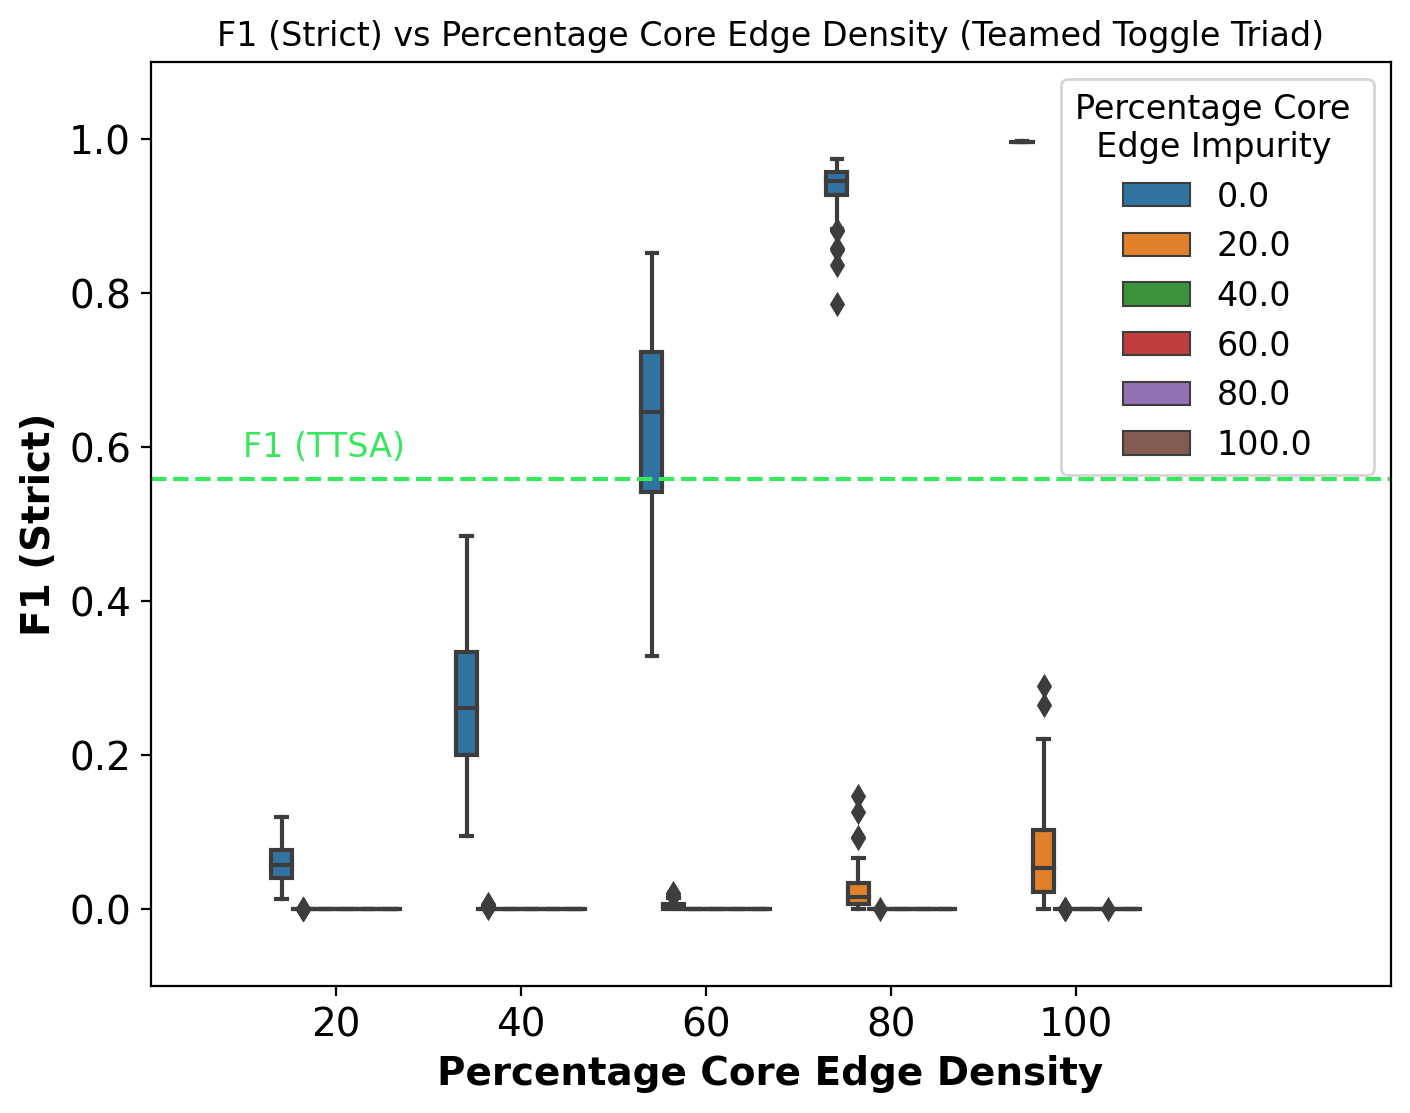

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'F1 (Strict)'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('F1 (Strict) vs Percentage Core Edge Density (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('F1 (Strict)', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,5.7)
    plt.axhline(y=0.559, linestyle='--', color='#39e75f')
    plt.text(-0.5, 0.6, 'F1 (TTSA)', color='#39e75f', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='upper right')
    plt.savefig('plotting_triad_impurity_density/F1_Strict_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Triad.png')

plt.show()


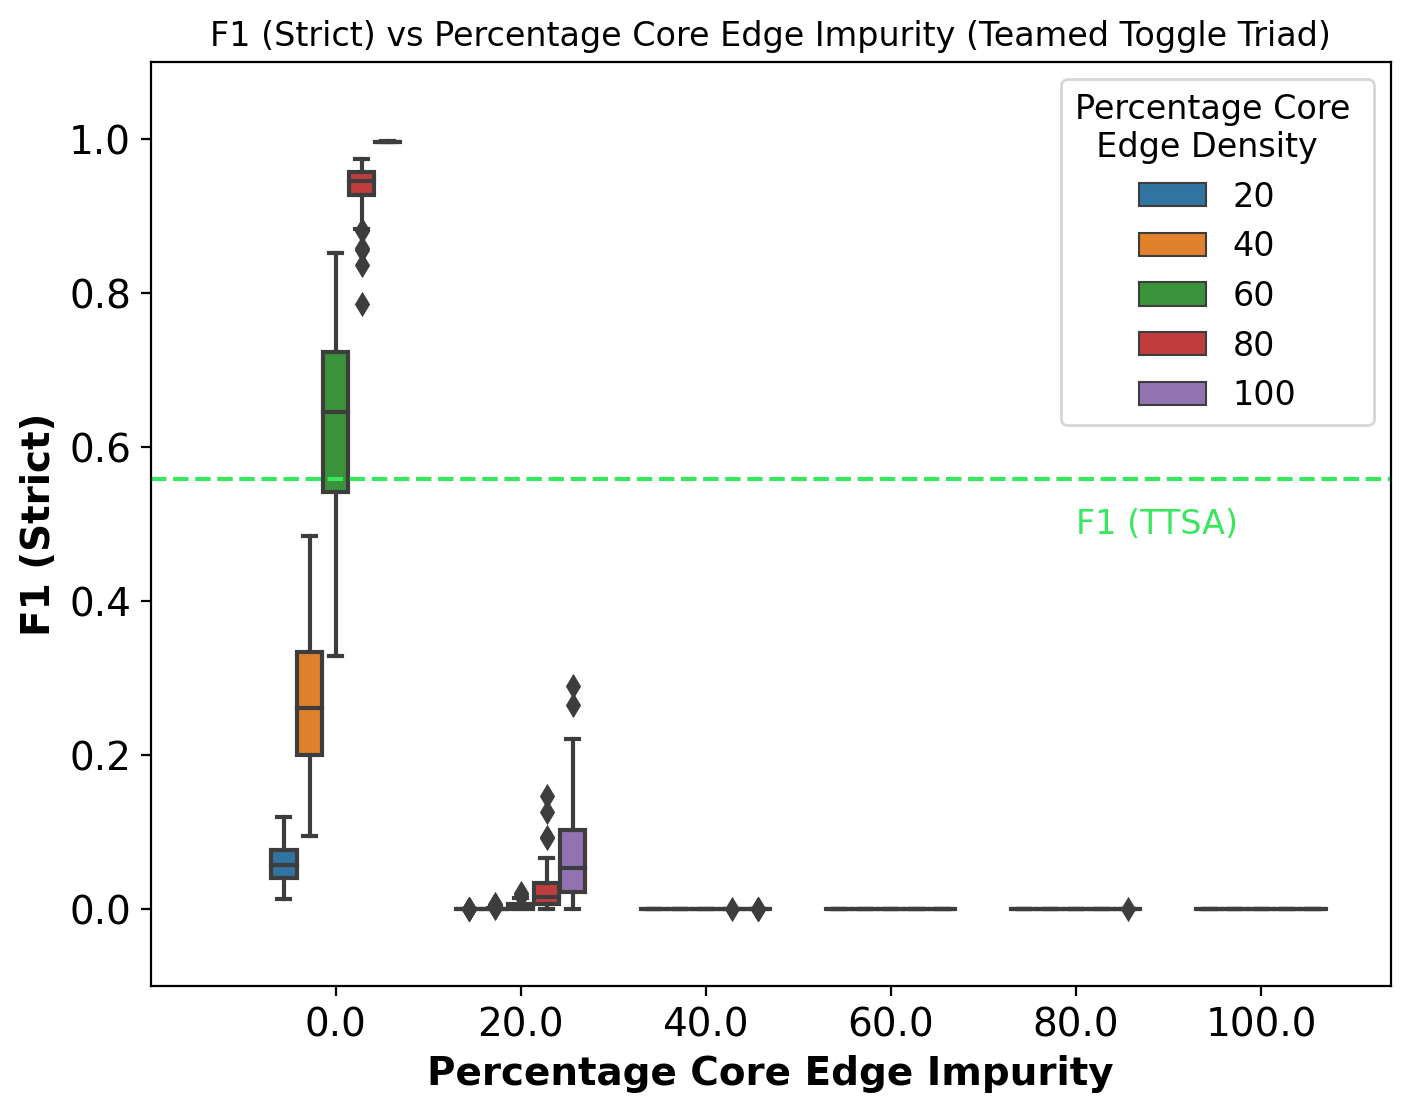

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'F1 (Strict)'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue='Core_Density',
        x='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('F1 (Strict) vs Percentage Core Edge Impurity (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel('F1 (Strict)', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,5.7)
    plt.axhline(y=0.559, linestyle='--', color='#39e75f')
    plt.text(4, 0.5, 'F1 (TTSA)', color='#39e75f', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Density', fontsize=12, loc='upper right')
    plt.savefig('plotting_triad_impurity_density/F1_Strict_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Triad.png')

plt.show()


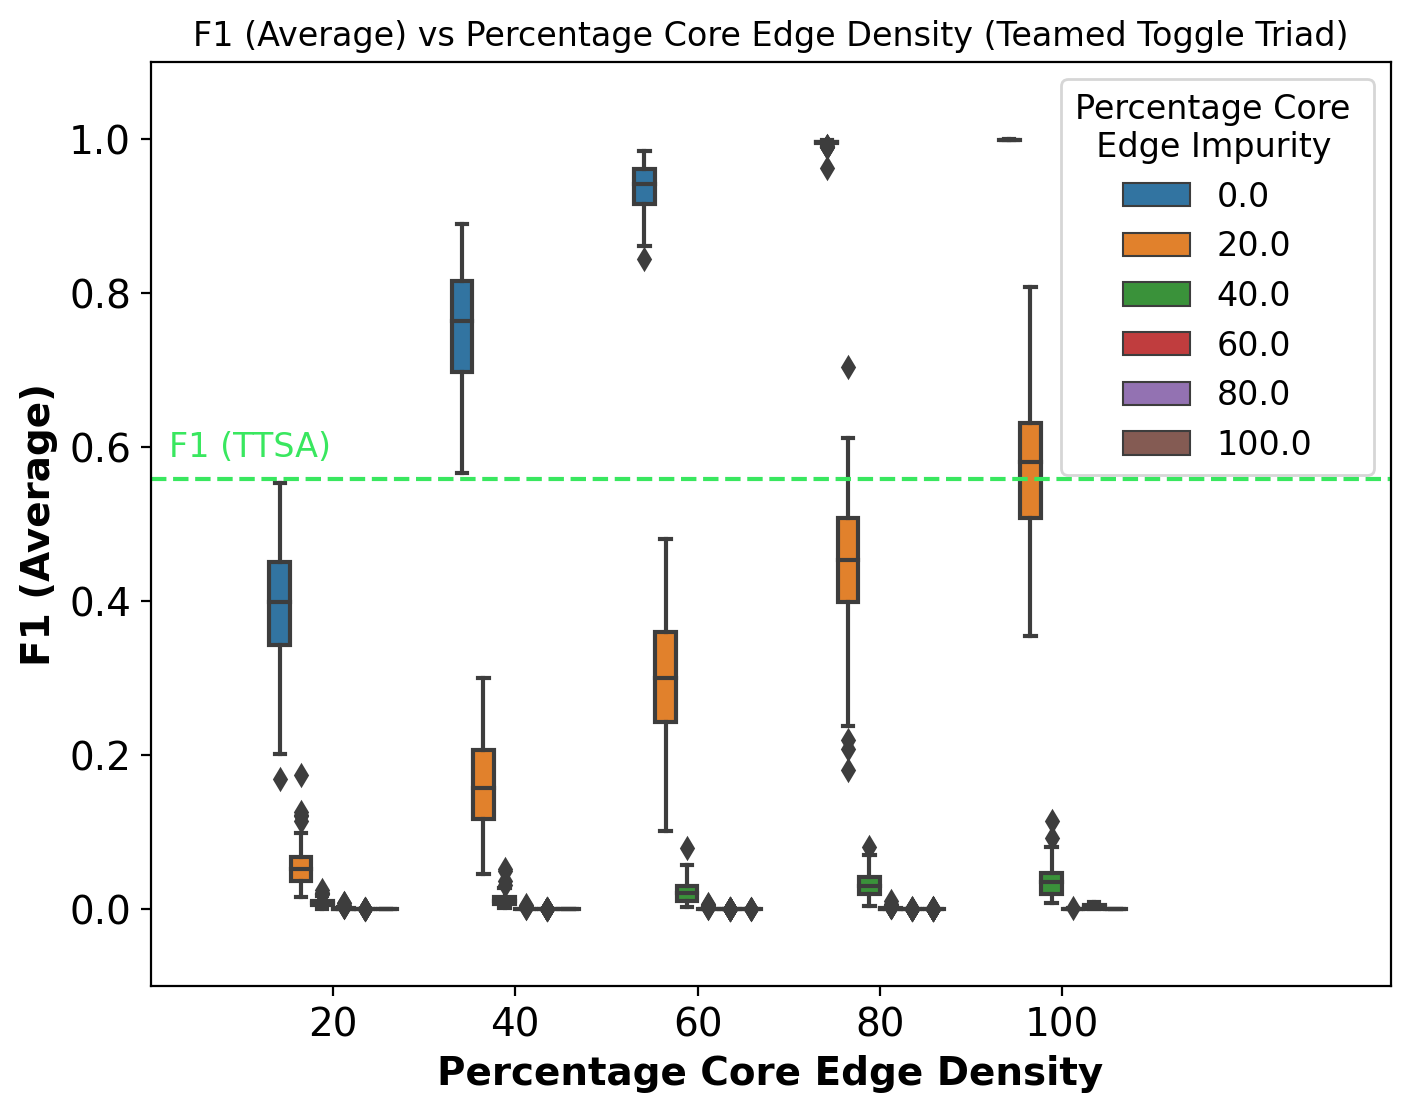

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'F1 (Average)'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('F1 (Average) vs Percentage Core Edge Density (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('F1 (Average)', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,5.8)
    plt.axhline(y=0.559, linestyle='--', color='#39e75f')
    plt.text(-0.9, 0.6, 'F1 (TTSA)', color='#39e75f', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='upper right')
    plt.savefig('plotting_triad_impurity_density/F1_Average_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Triad.png')

plt.show()


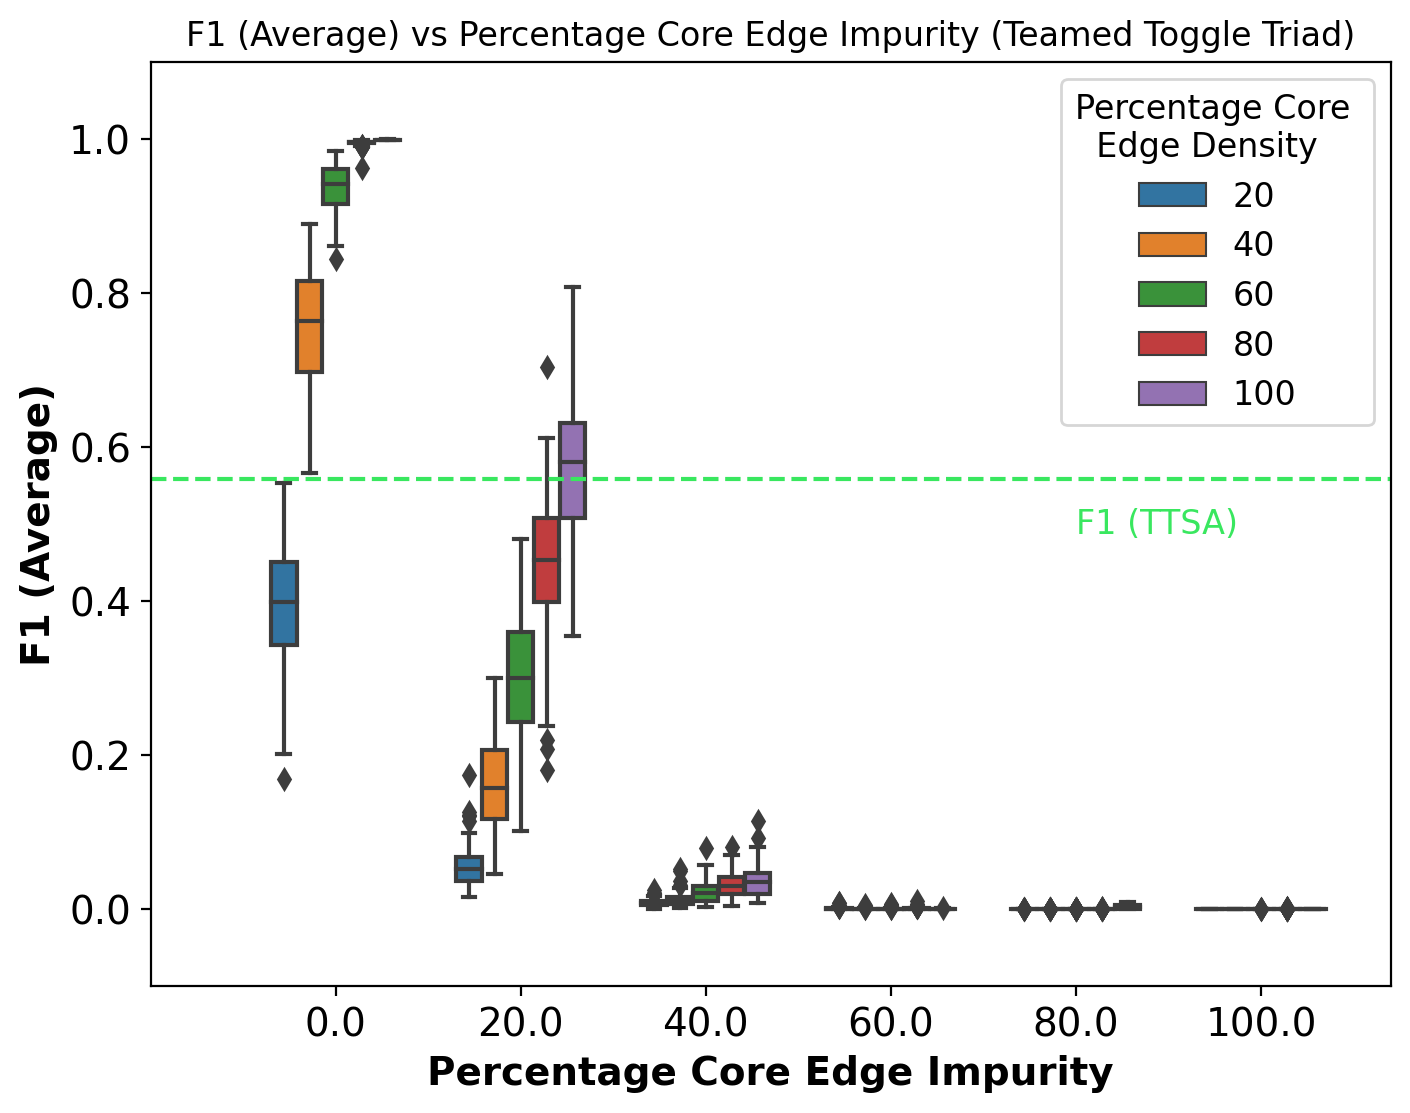

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'F1 (Average)'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue='Core_Density',
        x='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('F1 (Average) vs Percentage Core Edge Impurity (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel('F1 (Average)', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,5.7)
    plt.axhline(y=0.559, linestyle='--', color='#39e75f')
    plt.text(4, 0.5, 'F1 (TTSA)', color='#39e75f', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Density', fontsize=12, loc='upper right')
    plt.savefig('plotting_triad_impurity_density/F1_Average_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Triad.png')

plt.show()


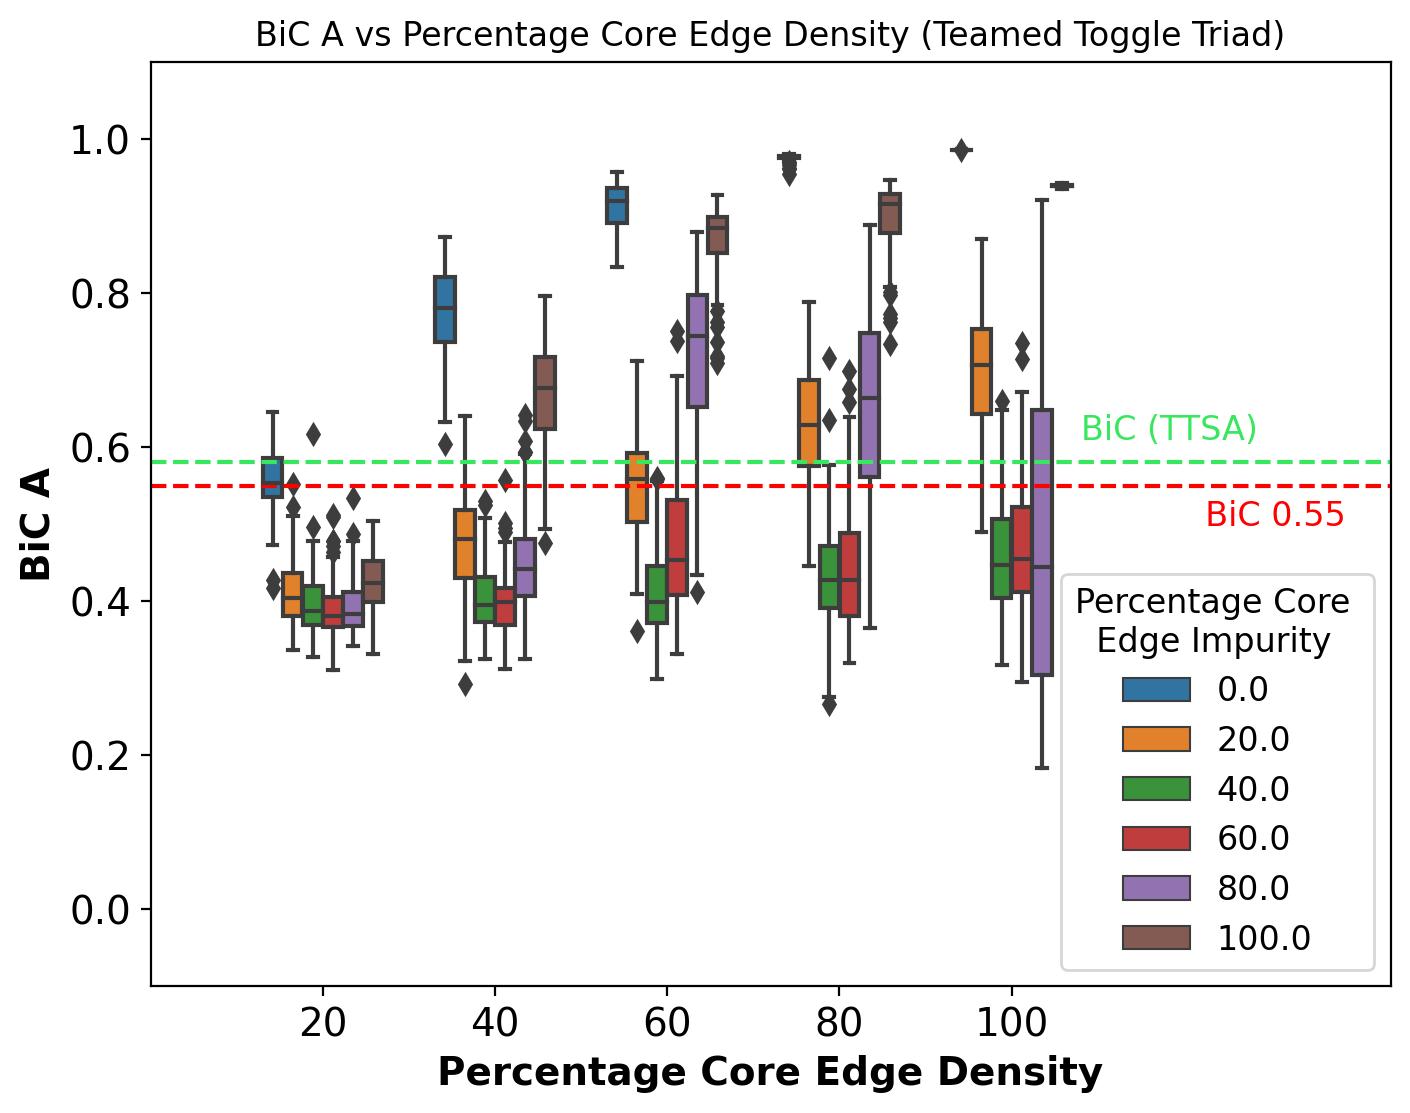

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC A'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('BiC A vs Percentage Core Edge Density (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('BiC A', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,6.2)
    plt.axhline(y=0.581, linestyle='--', color='#39e75f')
    plt.text(4.4, 0.622, 'BiC (TTSA)', color='#39e75f', ha='left', va='center', fontsize=12)

    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(5, 0.51, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='lower right')
    plt.savefig('plotting_triad_impurity_density/BiC_A_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Triad.png')

plt.show()


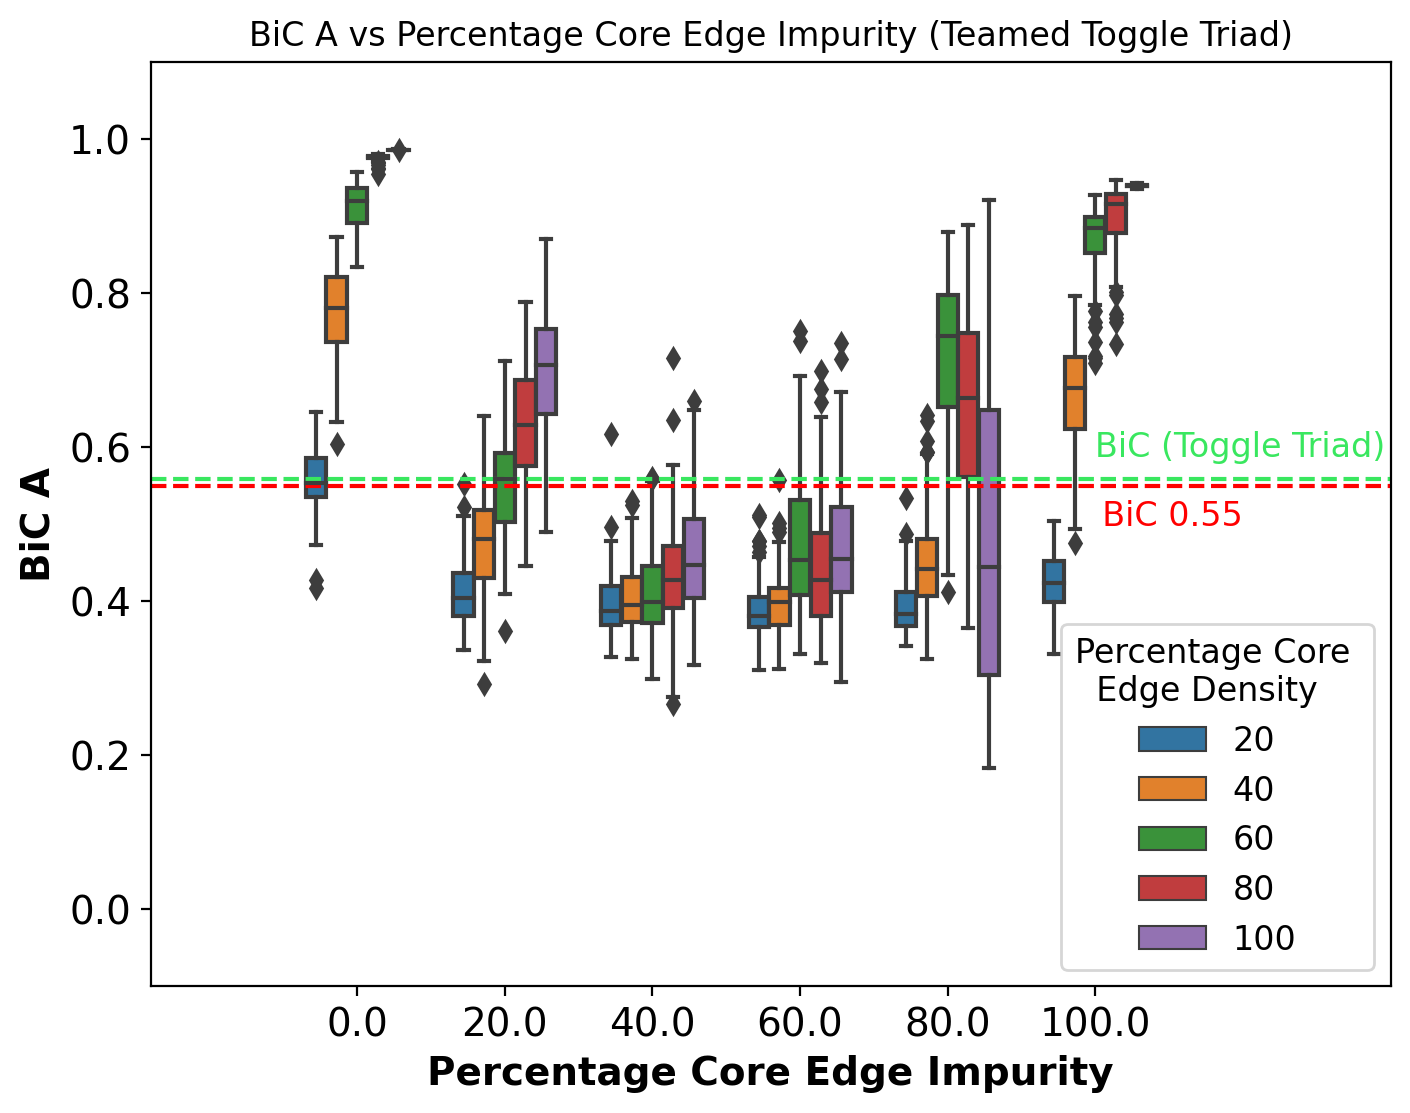

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC A'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue='Core_Density',
        x='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('BiC A vs Percentage Core Edge Impurity (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel('BiC A', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1.4,7)
    plt.axhline(y=0.559, linestyle='--', color='#39e75f')
    plt.text(5, 0.6, 'BiC (Toggle Triad)', color='#39e75f', ha='left', va='center', fontsize=12)

    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(4.9, 0.51, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Density', fontsize=12, loc='lower right')
    plt.savefig('plotting_triad_impurity_density/BiC_A_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Triad.png')

plt.show()


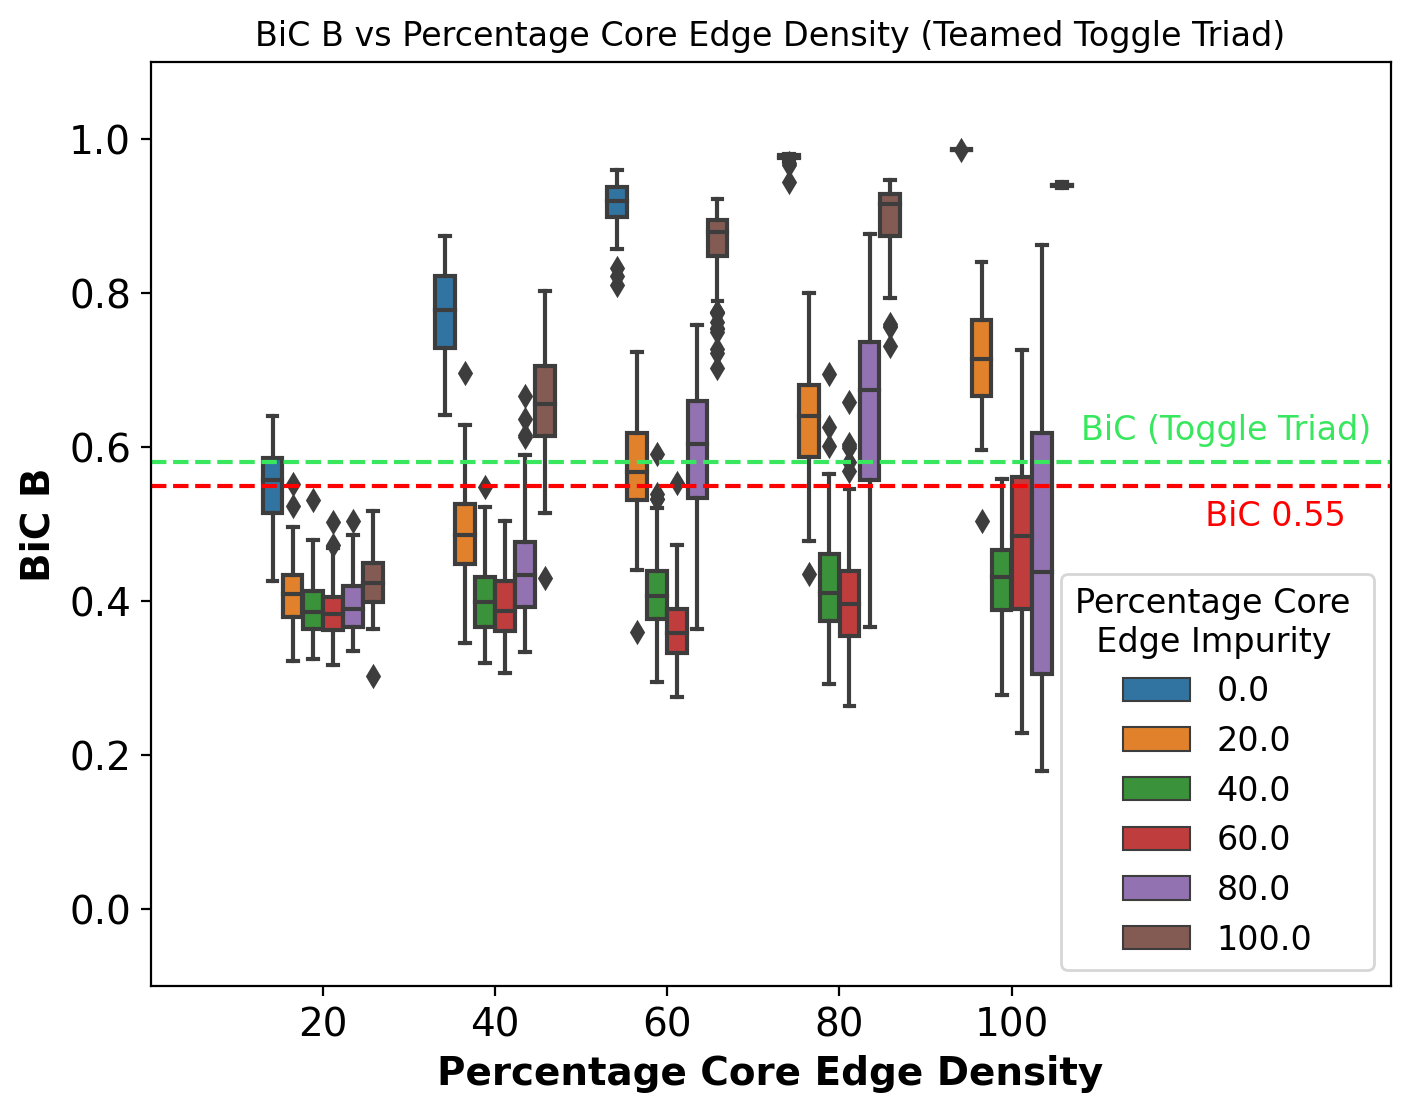

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC B'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('BiC B vs Percentage Core Edge Density (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('BiC B', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,6.2)
    plt.axhline(y=0.581, linestyle='--', color='#39e75f')
    plt.text(4.4, 0.622, 'BiC (Toggle Triad)', color='#39e75f', ha='left', va='center', fontsize=12)

    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(5, 0.51, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='lower right')
    plt.savefig('plotting_triad_impurity_density/BiC_B_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Triad.png')

plt.show()


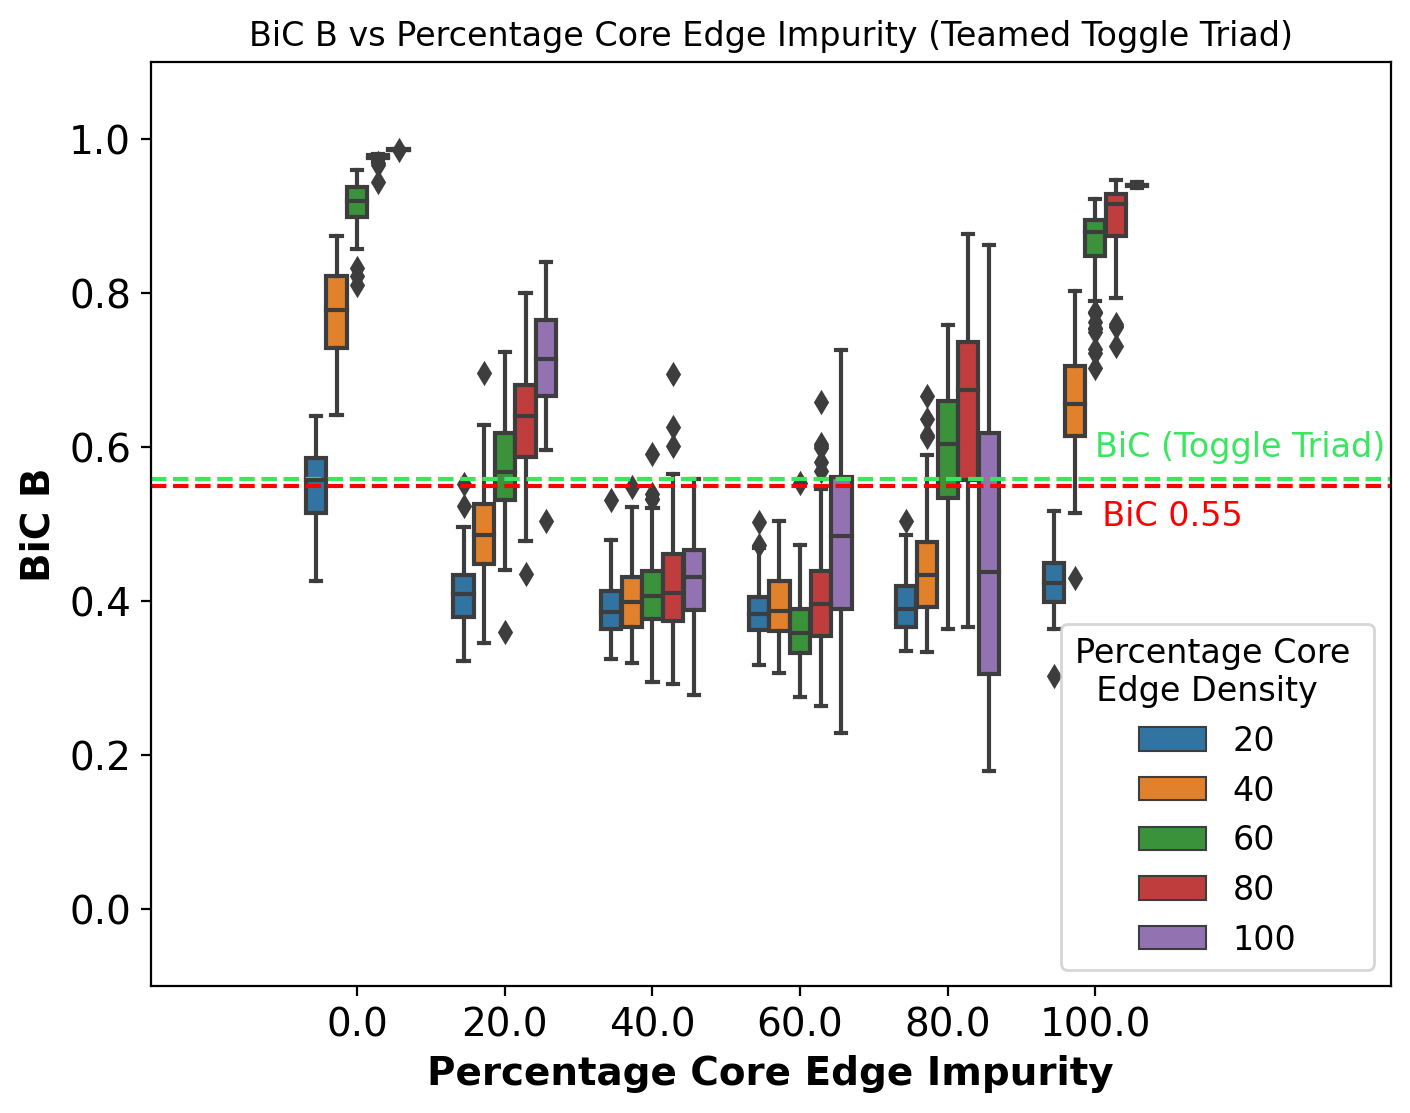

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC B'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue='Core_Density',
        x='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('BiC B vs Percentage Core Edge Impurity (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel('BiC B', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1.4,7)
    plt.axhline(y=0.559, linestyle='--', color='#39e75f')
    plt.text(5, 0.6, 'BiC (Toggle Triad)', color='#39e75f', ha='left', va='center', fontsize=12)

    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(4.9, 0.51, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Density', fontsize=12, loc='lower right')
    plt.savefig('plotting_triad_impurity_density/BiC_B_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Triad.png')

plt.show()


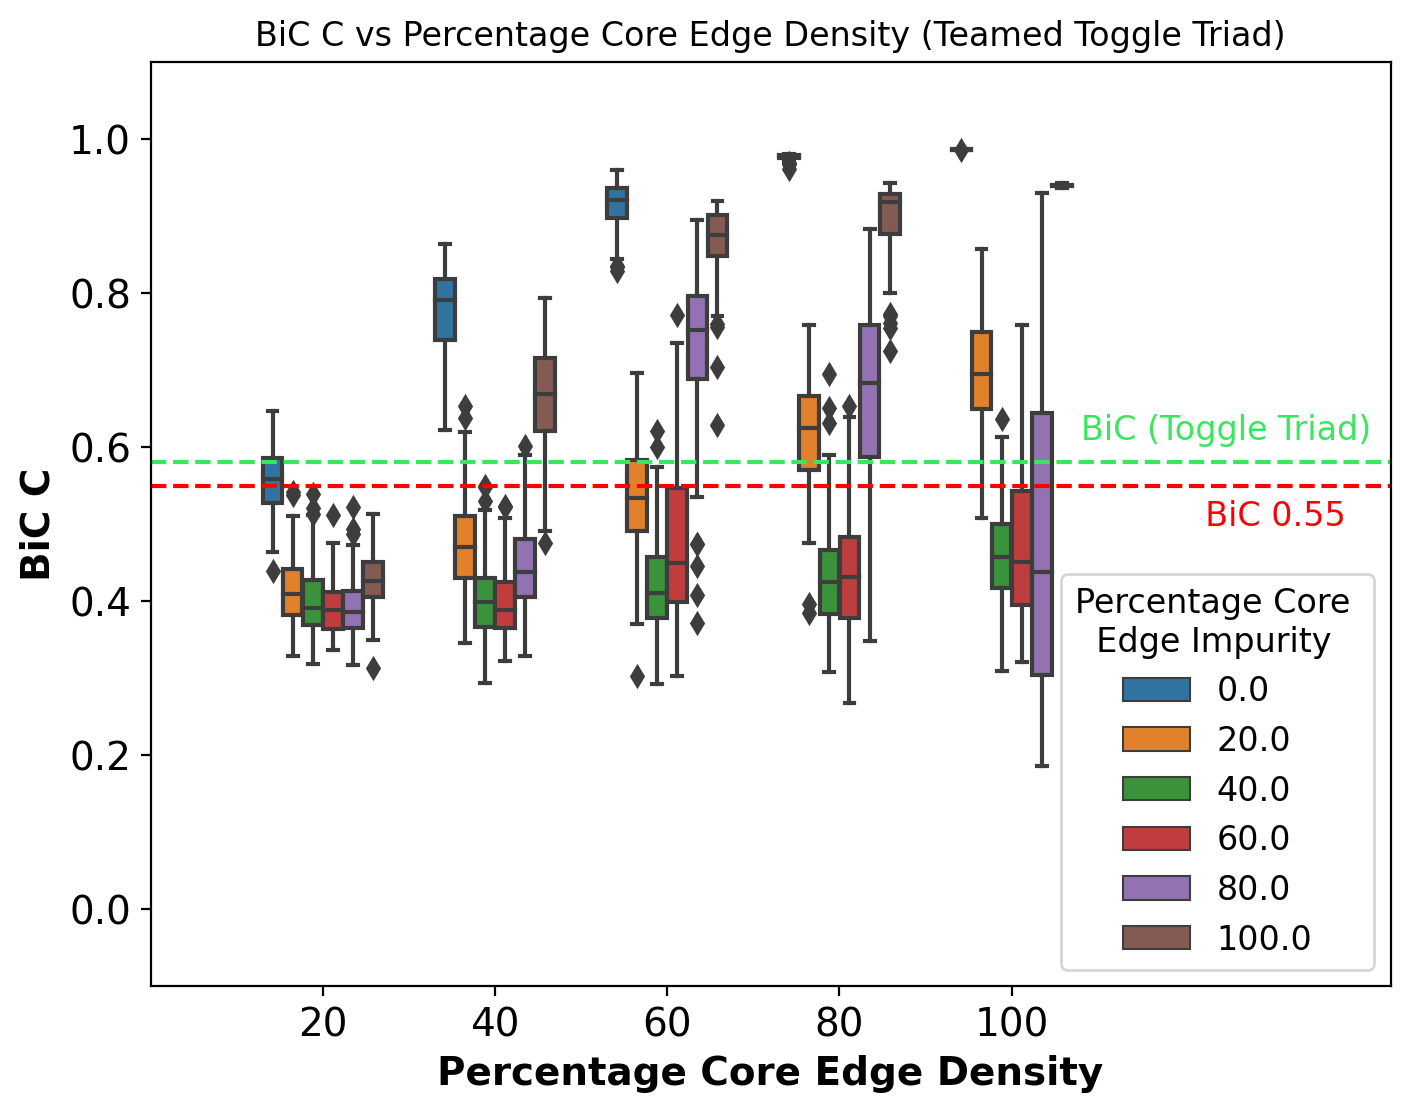

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC C'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('BiC C vs Percentage Core Edge Density (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('BiC C', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1,6.2)
    plt.axhline(y=0.581, linestyle='--', color='#39e75f')
    plt.text(4.4, 0.622, 'BiC (Toggle Triad)', color='#39e75f', ha='left', va='center', fontsize=12)

    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(5, 0.51, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='lower right')
    plt.savefig('plotting_triad_impurity_density/BiC_C_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Triad.png')

plt.show()


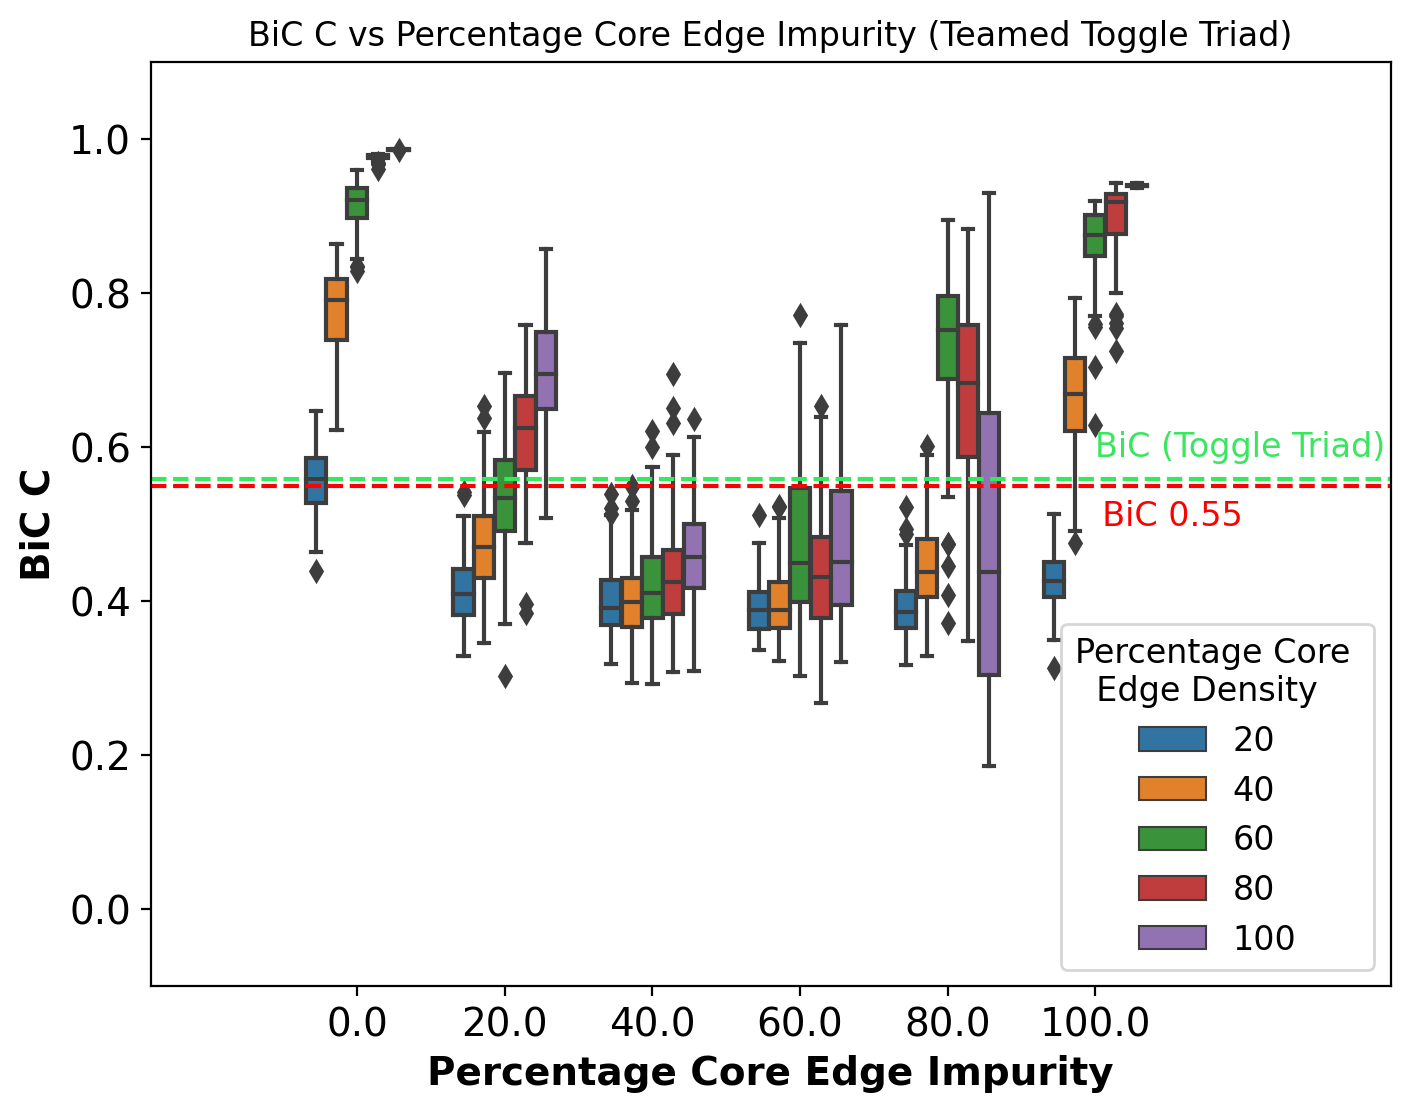

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'BiC C'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        hue='Core_Density',
        x='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('BiC C vs Percentage Core Edge Impurity (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel('BiC C', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1.4,7)
    plt.axhline(y=0.559, linestyle='--', color='#39e75f')
    plt.text(5, 0.6, 'BiC (Toggle Triad)', color='#39e75f', ha='left', va='center', fontsize=12)

    plt.axhline(y=0.55, linestyle='--', color='red')
    plt.text(4.9, 0.51, '  BiC 0.55', color='red', ha='left', va='center', fontsize=12)

    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Density', fontsize=12, loc='lower right')
    plt.savefig('plotting_triad_impurity_density/BiC_C_vs_Percentage_Core_Edge_Impurity_Teamed_Toggle_Triad.png')

plt.show()


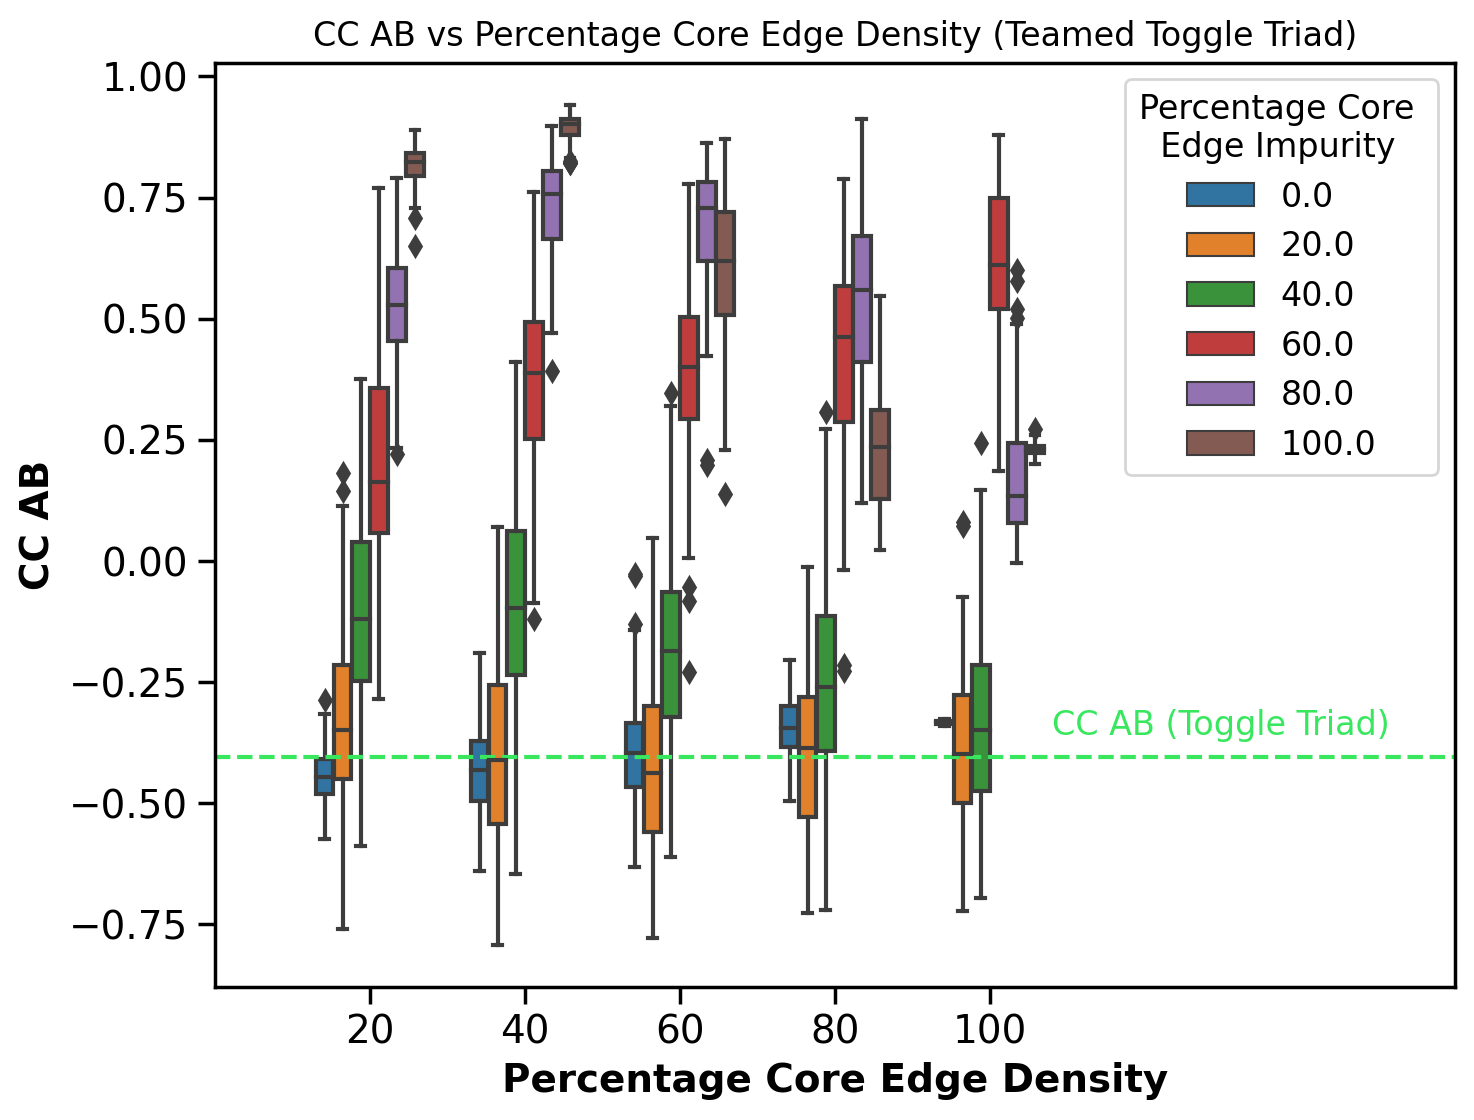

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'CC AB'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
# plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('CC AB vs Percentage Core Edge Density (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('CC AB', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # plt.ylim(-0.1, 1.1)
    plt.xlim(-1,7)
    plt.axhline(y=-0.405, linestyle='--', color='#39e75f')
    plt.text(4.4, -0.34, 'CC AB (Toggle Triad)', color='#39e75f', ha='left', va='center', fontsize=12)



    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='upper right')
    plt.savefig('plotting_triad_impurity_density/CC_AB_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Triad.png')

plt.show()


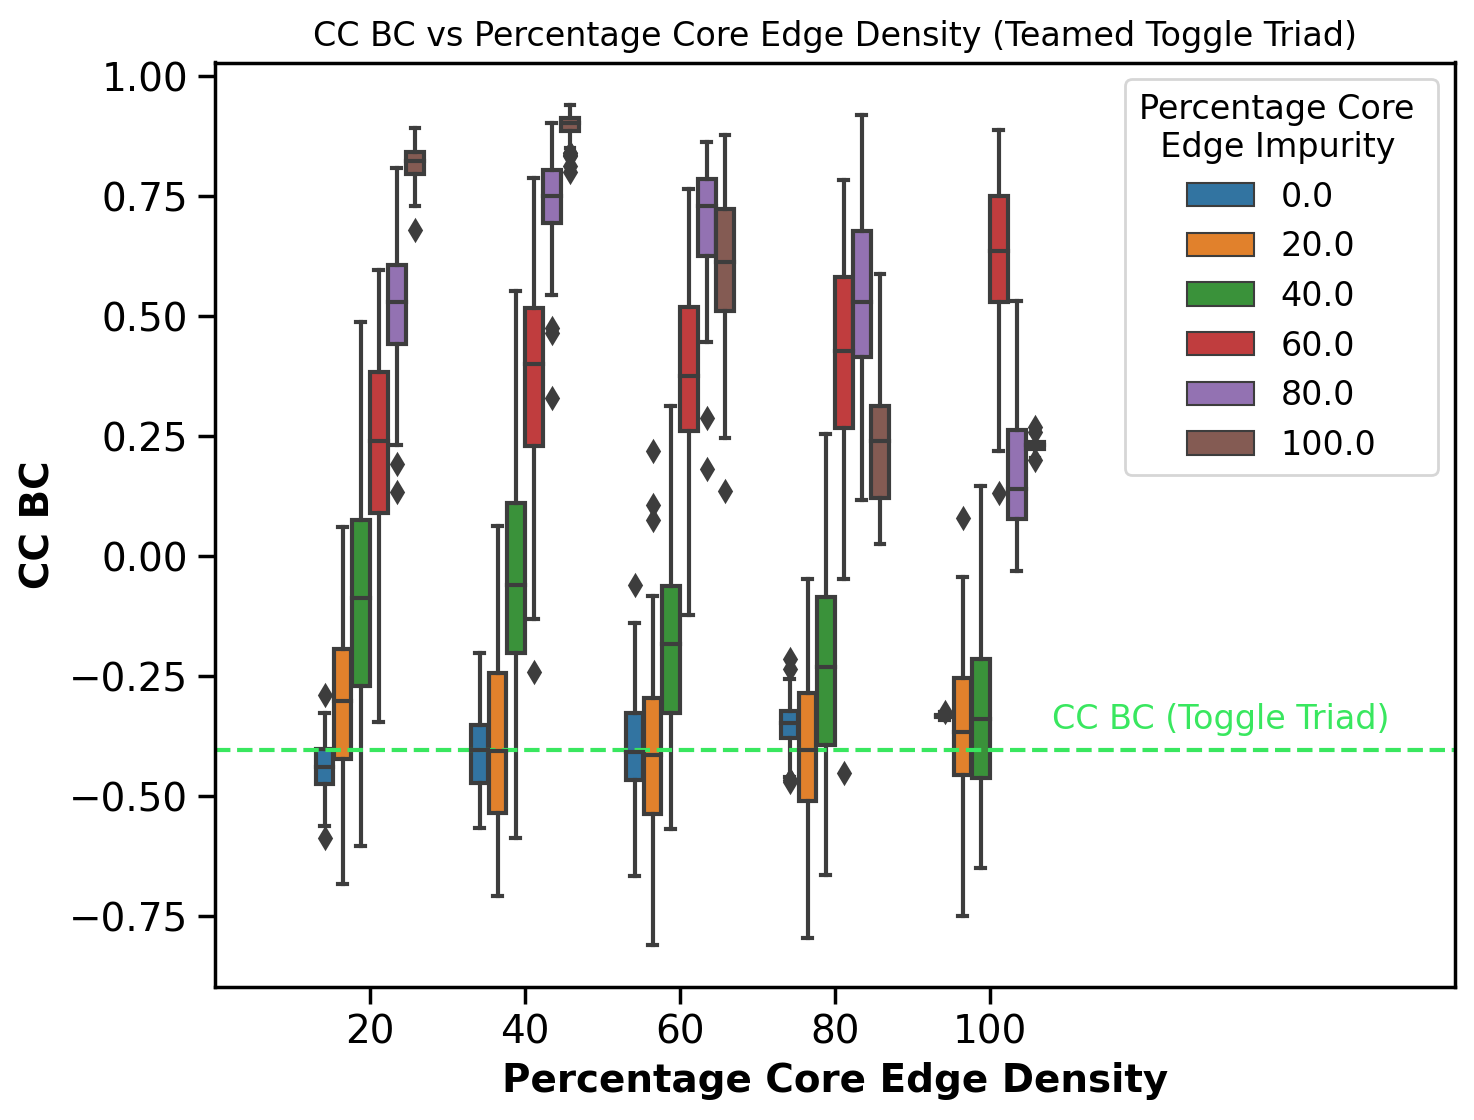

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'CC BC'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
# plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('CC BC vs Percentage Core Edge Density (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('CC BC', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # plt.ylim(-0.1, 1.1)
    plt.xlim(-1,7)
    plt.axhline(y=-0.405, linestyle='--', color='#39e75f')
    plt.text(4.4, -0.34, 'CC BC (Toggle Triad)', color='#39e75f', ha='left', va='center', fontsize=12)



    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='upper right')
    plt.savefig('plotting_triad_impurity_density/CC_BC_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Triad.png')

plt.show()


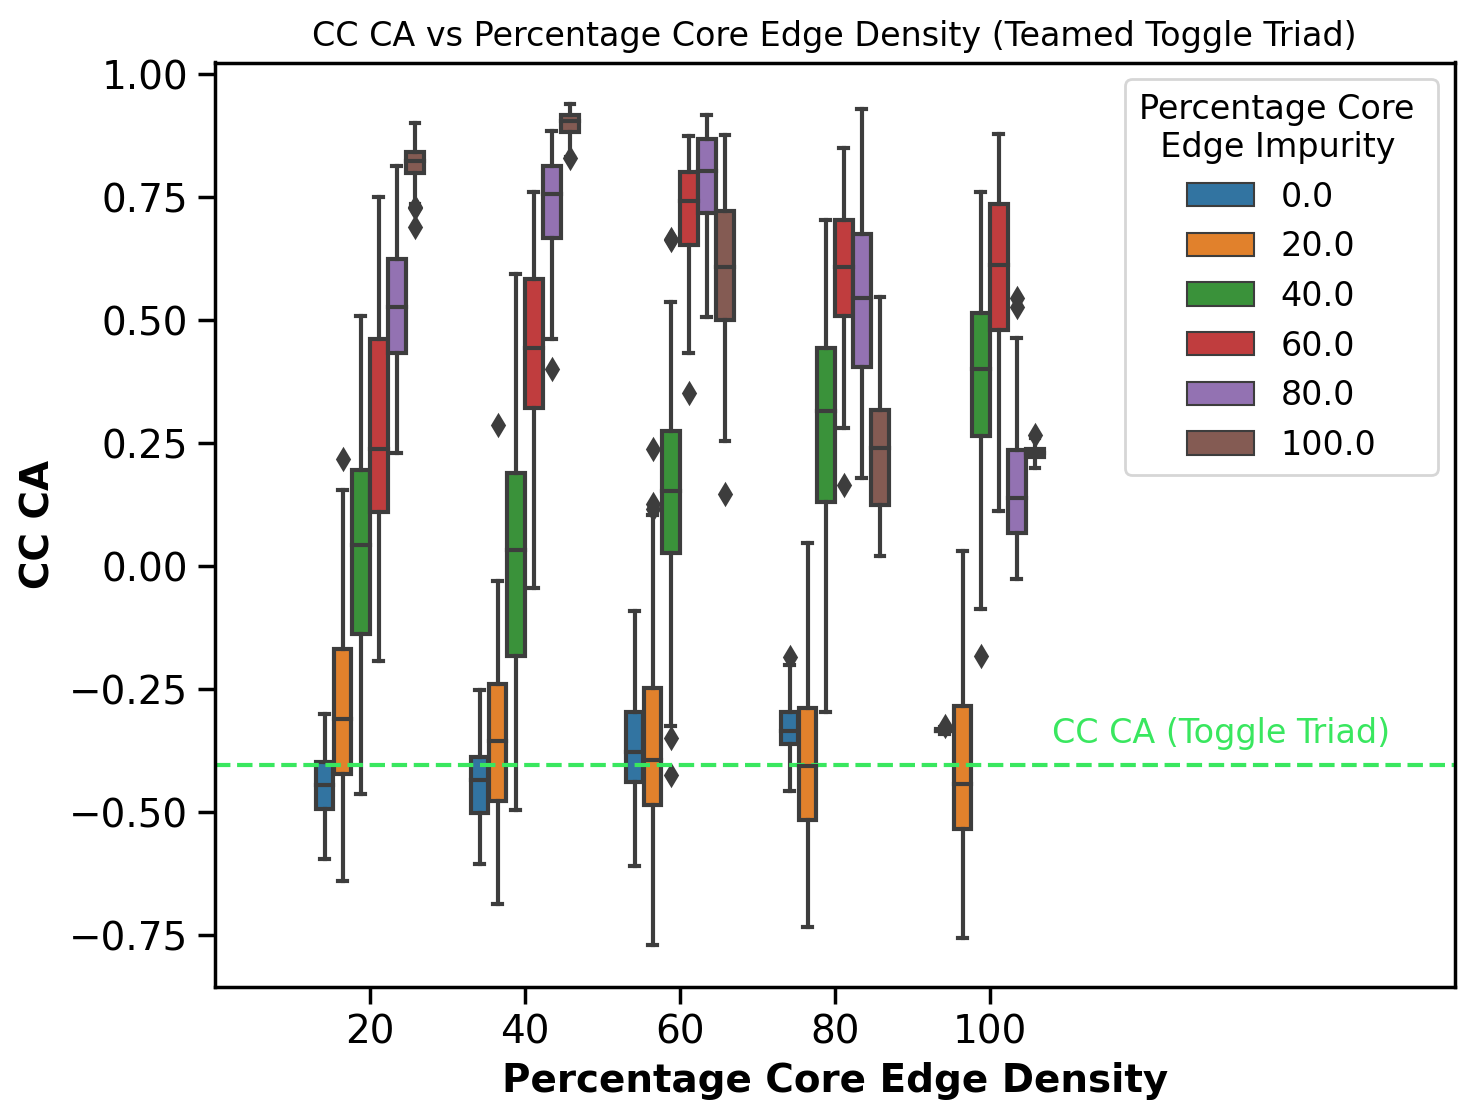

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming melt_table_complete is your DataFrame containing the required data

Metric = 'CC CA'

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
# plt.ylim(0, -1.04)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y=Metric,
        x='Core_Density',
        hue='Percentage_Impurity',
        data=triad_impurity_density ,
        width=0.7
    )

    plt.title('CC CA vs Percentage Core Edge Density (Teamed Toggle Triad)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('CC CA', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # plt.ylim(-0.1, 1.1)
    plt.xlim(-1,7)
    plt.axhline(y=-0.405, linestyle='--', color='#39e75f')
    plt.text(4.4, -0.34, 'CC CA (Toggle Triad)', color='#39e75f', ha='left', va='center', fontsize=12)



    # Set legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(title='Percentage Core \n  Edge Impurity', fontsize=12, loc='upper right')
    plt.savefig('plotting_triad_impurity_density/CC_CA_vs_Percentage_Core_Edge_Density_Teamed_Toggle_Triad.png')

plt.show()


In [368]:
triad_impurity_density.columns

Index(['Unnamed: 0', 'index', 'Type', 'Core_Density', 'Peripheral_Nodes',
       'Peripheral_Edges', 'BiC A', 'BiC B', 'BiC C', 'CC AB', 'CC BC',
       'CC CA', 'F1 (Average)', 'F1 (Strict)', 'Team Strength',
       'in_degree_Team_A', 'in_degree_Team_B', 'in_degree_Team_C',
       'Number_of_Self_Activations', 'Average Indegree Per Core Node',
       'Self Activation Status', 'Team_Size', 'Percentage_Impurity',
       'Team Size'],
      dtype='object')

In [372]:
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_database =database.copy()
scaled_database.loc[:,:] = ss.fit_transform(database)

In [369]:
database = triad_impurity_density.loc[:,['F1 (Strict)','Percentage_Impurity','Core_Density']]


F1 (Strict)  Percentage_Impurity  Core_Density
0        0.077895                  0.0            20
1        0.021808                  0.0            20
2        0.082126                  0.0            20
3        0.085243                  0.0            20
4        0.051410                  0.0            20
...           ...                  ...           ...
2995     0.000000                100.0           100
2996     0.000000                100.0           100
2997     0.000000                100.0           100
2998     0.000000                100.0           100
2999     0.000000                100.0           100

[3000 rows x 3 columns]

In [376]:
scaled_database =database.copy()
scaled_database.loc[:,:] = ss.fit_transform(database)

In [377]:
scaled_database_projected_on_F1 = pd.DataFrame()
columns_dat = scaled_database.columns
for i in columns_dat:
    v1 = np.array(scaled_database.loc[:,'F1 (Strict)'])
    v2 = np.array(scaled_database.loc[:,i])
    scaled_database_projected_on_F1.loc[0,i] = np.dot(v1,v2)/(np.dot(v1,v1)**0.5 * np.dot(v2,v2)**0.5)

In [378]:
scaled_database_projected_on_F1

F1 (Strict)  Percentage_Impurity  Core_Density
0          1.0             -0.54722      0.241634

In [381]:
import pandas as pd
import statsmodels.api as sm

# Load your data into a pandas DataFrame
# Assuming your DataFrame is named 'df'
# Replace 'your_dataset.csv' with the actual file path if you're loading from a CSV file
# df = pd.read_csv('your_dataset.csv')

# Assuming 'Percentage_Impurity' and 'Core_Density' are independent variables
X = scaled_database[['Percentage_Impurity', 'Core_Density']]

# Assuming 'F1 (Strict)' is the dependent variable
y = scaled_database['F1 (Strict)']

# Add a constant term to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            F1 (Strict)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     835.0
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          5.71e-289
Time:                        10:48:29   Log-Likelihood:                -3592.4
No. Observations:                3000   AIC:                             7191.
Df Residuals:                    2997   BIC:                             7209.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -4.51e-17    